In [2]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
from scipy.cluster.hierarchy import dendrogram
import networkx as nx
import ujson
import os.path


### plot_dendrogram(distance_matrix, labels, linkage="single", truncate_level=-1,  figure_size=(20, 15), dpi=300)
Perform hierarchical clustering on given distance matrix, and draw a dendrogram of the clustering result.

**distance_matrix**: the distance matrix to perform hierarchical clustering on.\
**labels**: A list of labels corresponding to the distance matrix. The order of labels should be the same as the indices of distance matrix.\
**linkage**: Linkage type, default to "single". Can be "single", "average", and "complete".\
**truncate_level**: Draw dendrogram with at most "truncate_level" levels. -1 to show the complete dendrogram. Default to -1.\
**figure_size**: Figure size of the output dendrogram. Default to (20, 15).\
**dpi**: DPI of the output dendrogram figure. Default to 300.


In [52]:
def plot_dendrogram(distance_matrix, labels, linkage="single", truncate_level=-1, figure_size=(20, 15), dpi=300):
    
    cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                                 compute_full_tree=True, linkage=linkage, compute_distances=True)
    cl.fit(distance_matrix)
    
    kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": labels}
    
    n_samples = len(cl.labels_)
    counts = np.zeros(cl.children_.shape[0])
    plt.figure(figsize=figure_size, dpi=dpi)
    for i, merge in enumerate(cl.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

        linkage_matrix = np.column_stack(
            [cl.children_, cl.distances_, counts]
        ).astype(float)
        dendrogram(linkage_matrix, **kwarg)
        pass

In [3]:
data_dir = "../data/"

# Hierarchical Clustering with collaboration distance

In [4]:
f_collab_distance = os.path.join()
df = pd.read_csv("collaboration_distances.csv")
faculties = list(df.columns)
faculties.pop(0)
df

Unnamed: 0  Kevin Ford  Jeremy Tyson  Anil  Hirani  \
0              Kevin Ford         0.0           3.0           4.0   
1            Jeremy Tyson         3.0           0.0           4.0   
2            Anil  Hirani         4.0           4.0           0.0   
3         Sheldon Katz H.         4.0           3.0           4.0   
4            Pierre Albin         4.0           4.0           4.0   
5     Nathan M.  Dunfield         4.0           4.0           1.0   
6     Alexandr  Kostochka         3.0           3.0           3.0   
7             Rinat Kedem         4.0           4.0           4.0   
8            Renming Song         4.0           2.0           4.0   
9       Christopher  Dodd         3.0           4.0           4.0   
10        Iwan M. Duursma         3.0           4.0           4.0   
11         Randy McCarthy         4.0           4.0           5.0   
12          Charles  Rezk         5.0           4.0           5.0   
13     Rui Loja Fernandes         4.0           4.0           3.0   
14           Igor Mineyev         3.0           4.0           4.0   
15        Sankar P. Dutta         5.0           4.0           5.0   
16        Alexander  Yong         3.0           3.0           4.0   
17           Susan Tolman         3.0           4.0           4.0   
18      M. Burak  Erdoğan         3.0           2.0           2.0   
19           Marius Junge         2.0           4.0           4.0   
20      Vera Mikyoung Hur         3.0           4.0           4.0   
21       Vesna Stojanoska         4.0           3.0           6.0   
22         Scott  Ahlgren         2.0           3.0           4.0   
23        Steven  Bradlow         4.0           1.0           4.0   
24              Zoi Rapti         3.0           4.0           3.0   
25      Richard B. Sowers         4.0           2.0           5.0   
26          Jozsef Balogh         2.0           3.0           4.0   
27       Denka  Kutzarova         1.0           4.0           5.0   
28    Alexandru Zaharescu         1.0           2.0           4.0   
29       Gabriele La Nave         3.0           4.0           5.0   
30           Matthew Ando         4.0           4.0           5.0   
31   Daniel Berwick-Evans         4.0           4.0           5.0   
32            Lee DeVille         4.0           4.0           3.0   
33         Florin P. Boca         2.0           3.0           5.0   
34          Jesse Thorner         2.0           3.0           5.0   
35       Vadim Zharnitsky         3.0           3.0           1.0   
36      Eugene M.  Lerman         3.0           3.0           4.0   
37         Bruce  Reznick         3.0           1.0           4.0   
38     Partha Sarathi Dey         3.0           4.0           4.0   
39        Aimo  Hinkkanen         2.0           2.0           4.0   
40       Igor G. Nikolaev         4.0           4.0           5.0   
41        James Pascaleff         5.0           6.0           5.0   
42         Jared  Bronski         3.0           4.0           3.0   
43           Runhuan Feng         5.0           4.0           5.0   
44       William  Haboush         4.0           4.0           4.0   
45      Yuliy Baryshnikov         3.0           3.0           2.0   
46    Eduard-Wilhelm Kirr         3.0           4.0           3.0   
47         Timur Oikhberg         2.0           4.0           5.0   
48         Felix Leditzky         4.0           5.0           5.0   
49       Kay  Kirkpatrick         3.0           3.0           4.0   
50          Xiaochen Jing         5.0           5.0           6.0   
51      Nikolaos Tzirakis         3.0           2.0           2.0   
52             Ely Kerman         4.0           3.0           5.0   
53  Philippe Di Francesco         3.0           4.0           5.0   
54    Richard S. Laugesen         3.0           3.0           4.0   
55       Jeremiah  Heller         4.0           5.0           6.0   
56        Rosemary Guzman         5.0           5.0           4.0   

    Sheldon 

In [5]:
r = 1        # Adjust distance matric
distance_mat = df[faculties].to_numpy() ** r
distance_mat

array([[0., 3., 4., ..., 3., 4., 5.],
       [3., 0., 4., ..., 3., 5., 5.],
       [4., 4., 0., ..., 4., 6., 4.],
       ...,
       [3., 3., 4., ..., 0., 5., 6.],
       [4., 5., 6., ..., 5., 0., 5.],
       [5., 5., 4., ..., 6., 5., 0.]])

### Dendrograms of Different Linkages

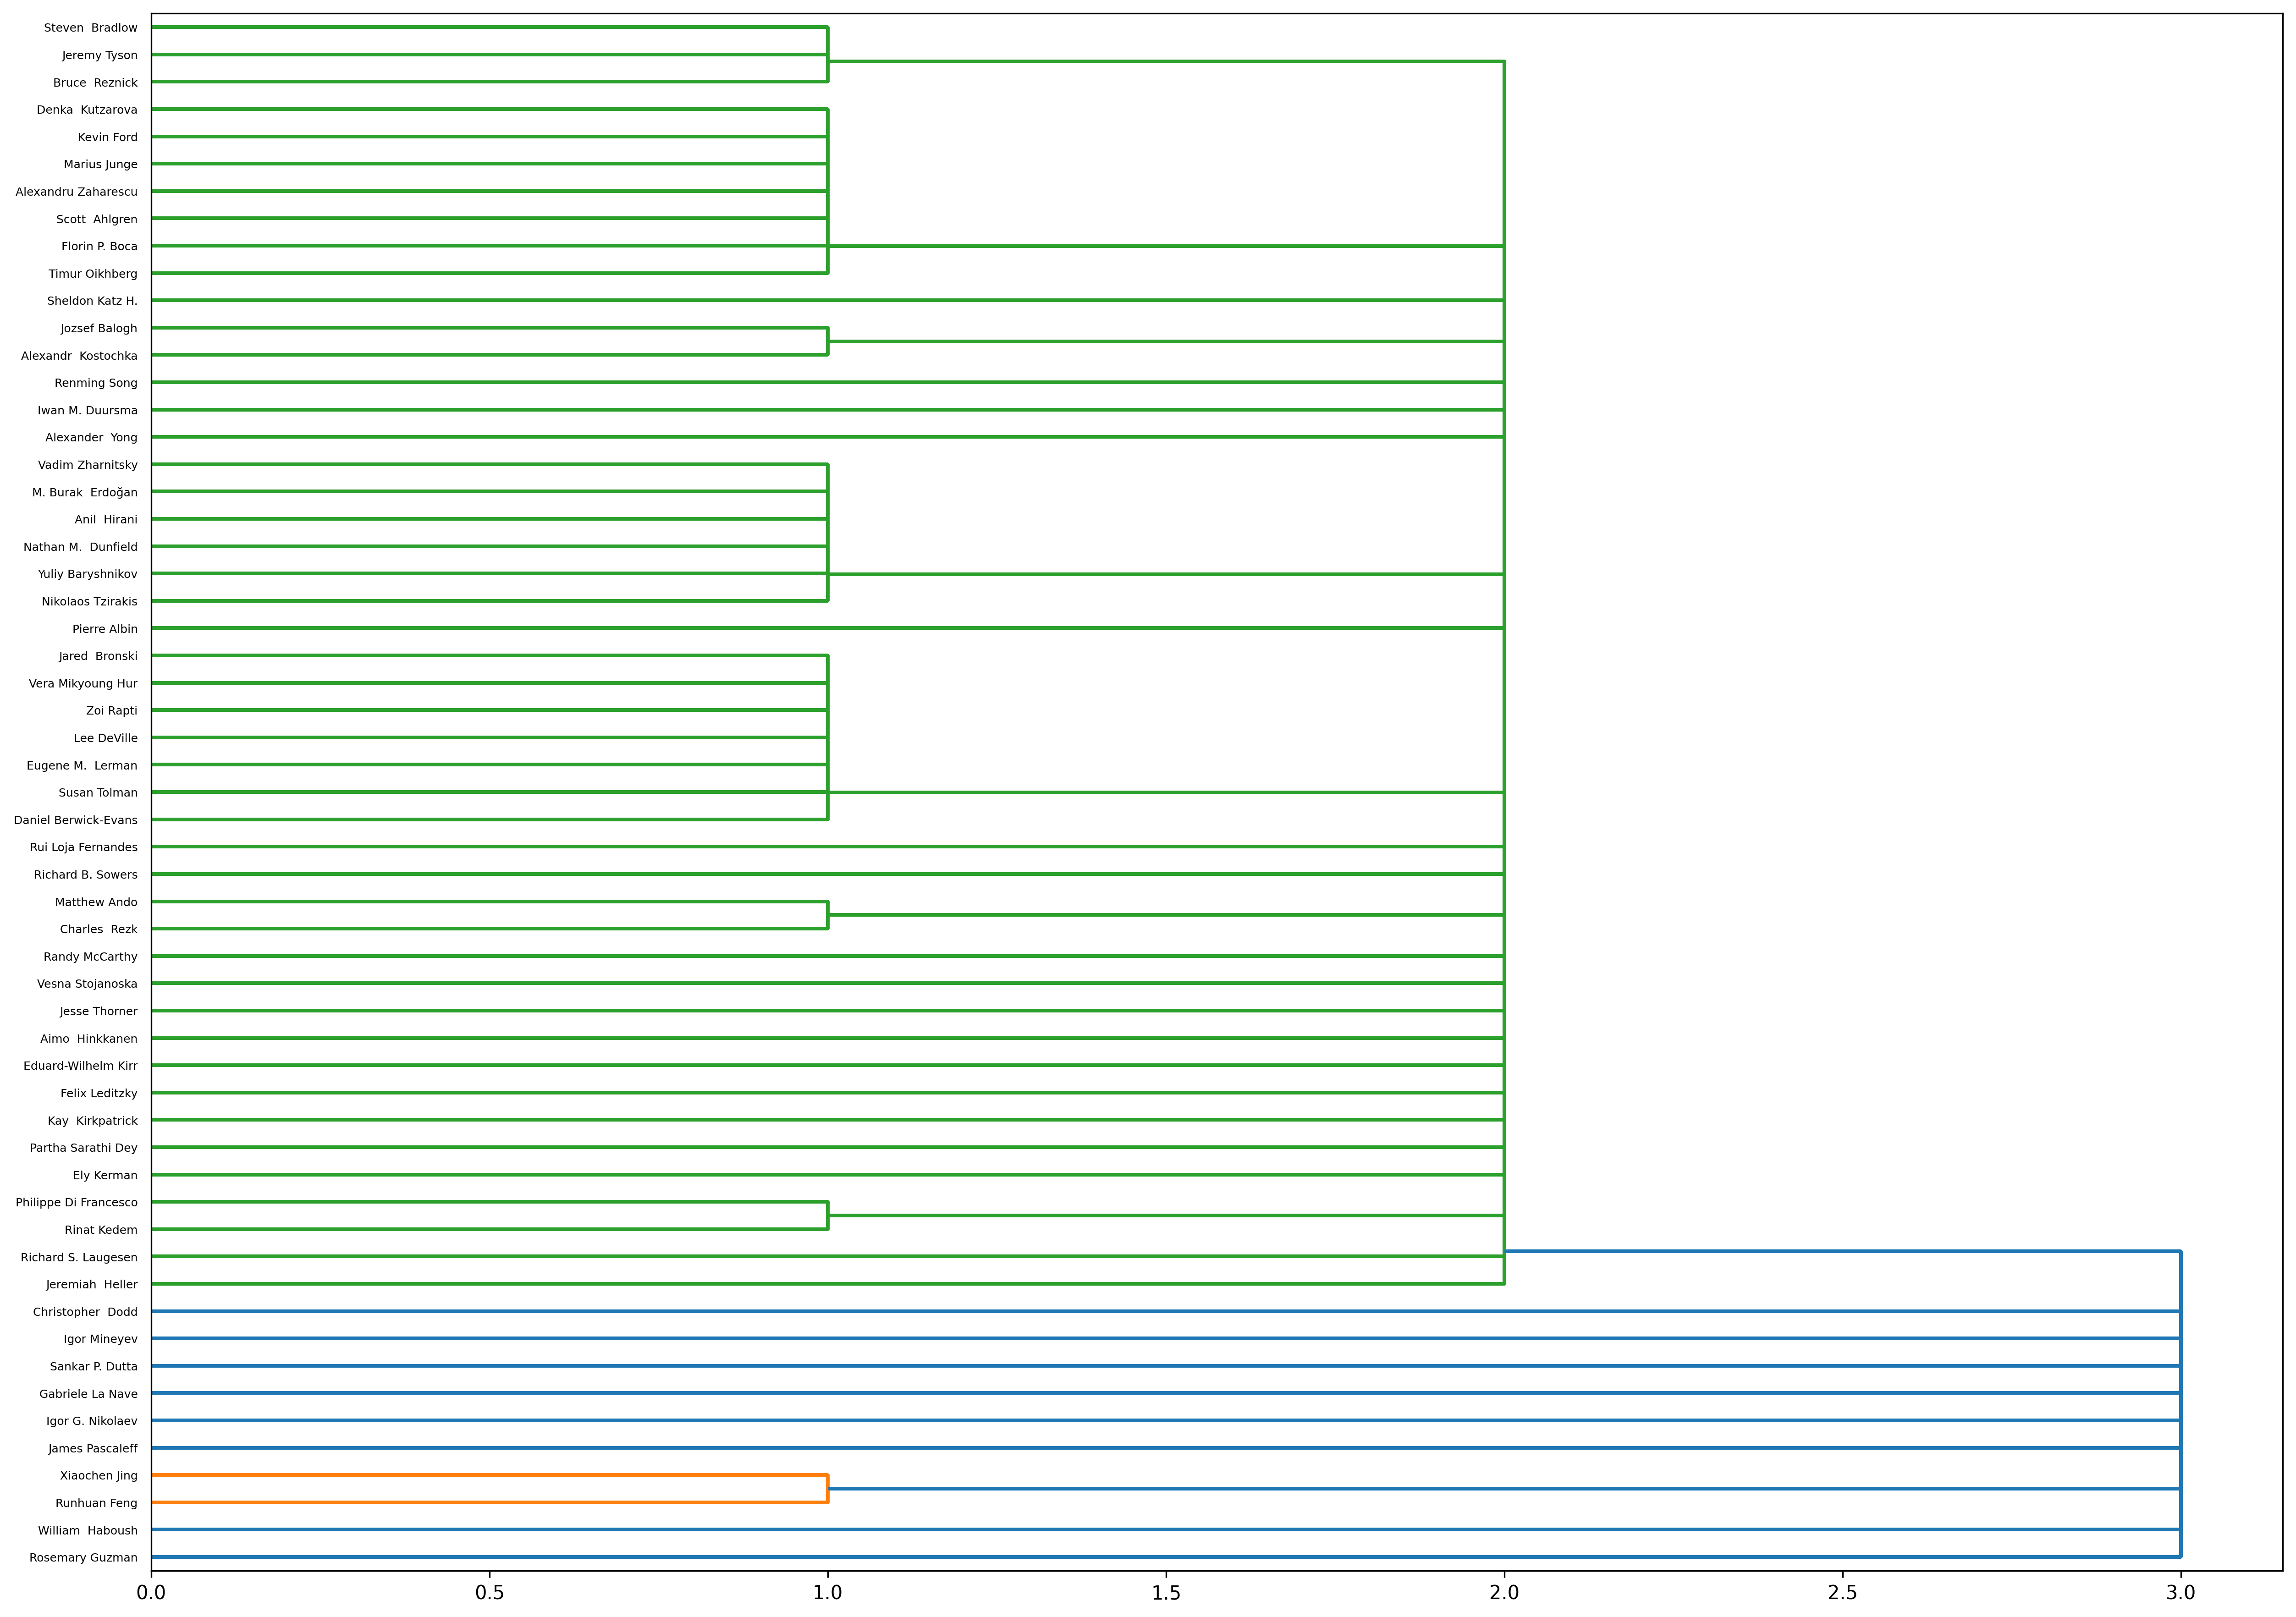

In [51]:
# Single
plot_dendrogram(distance_mat, faculties, linkage="single")


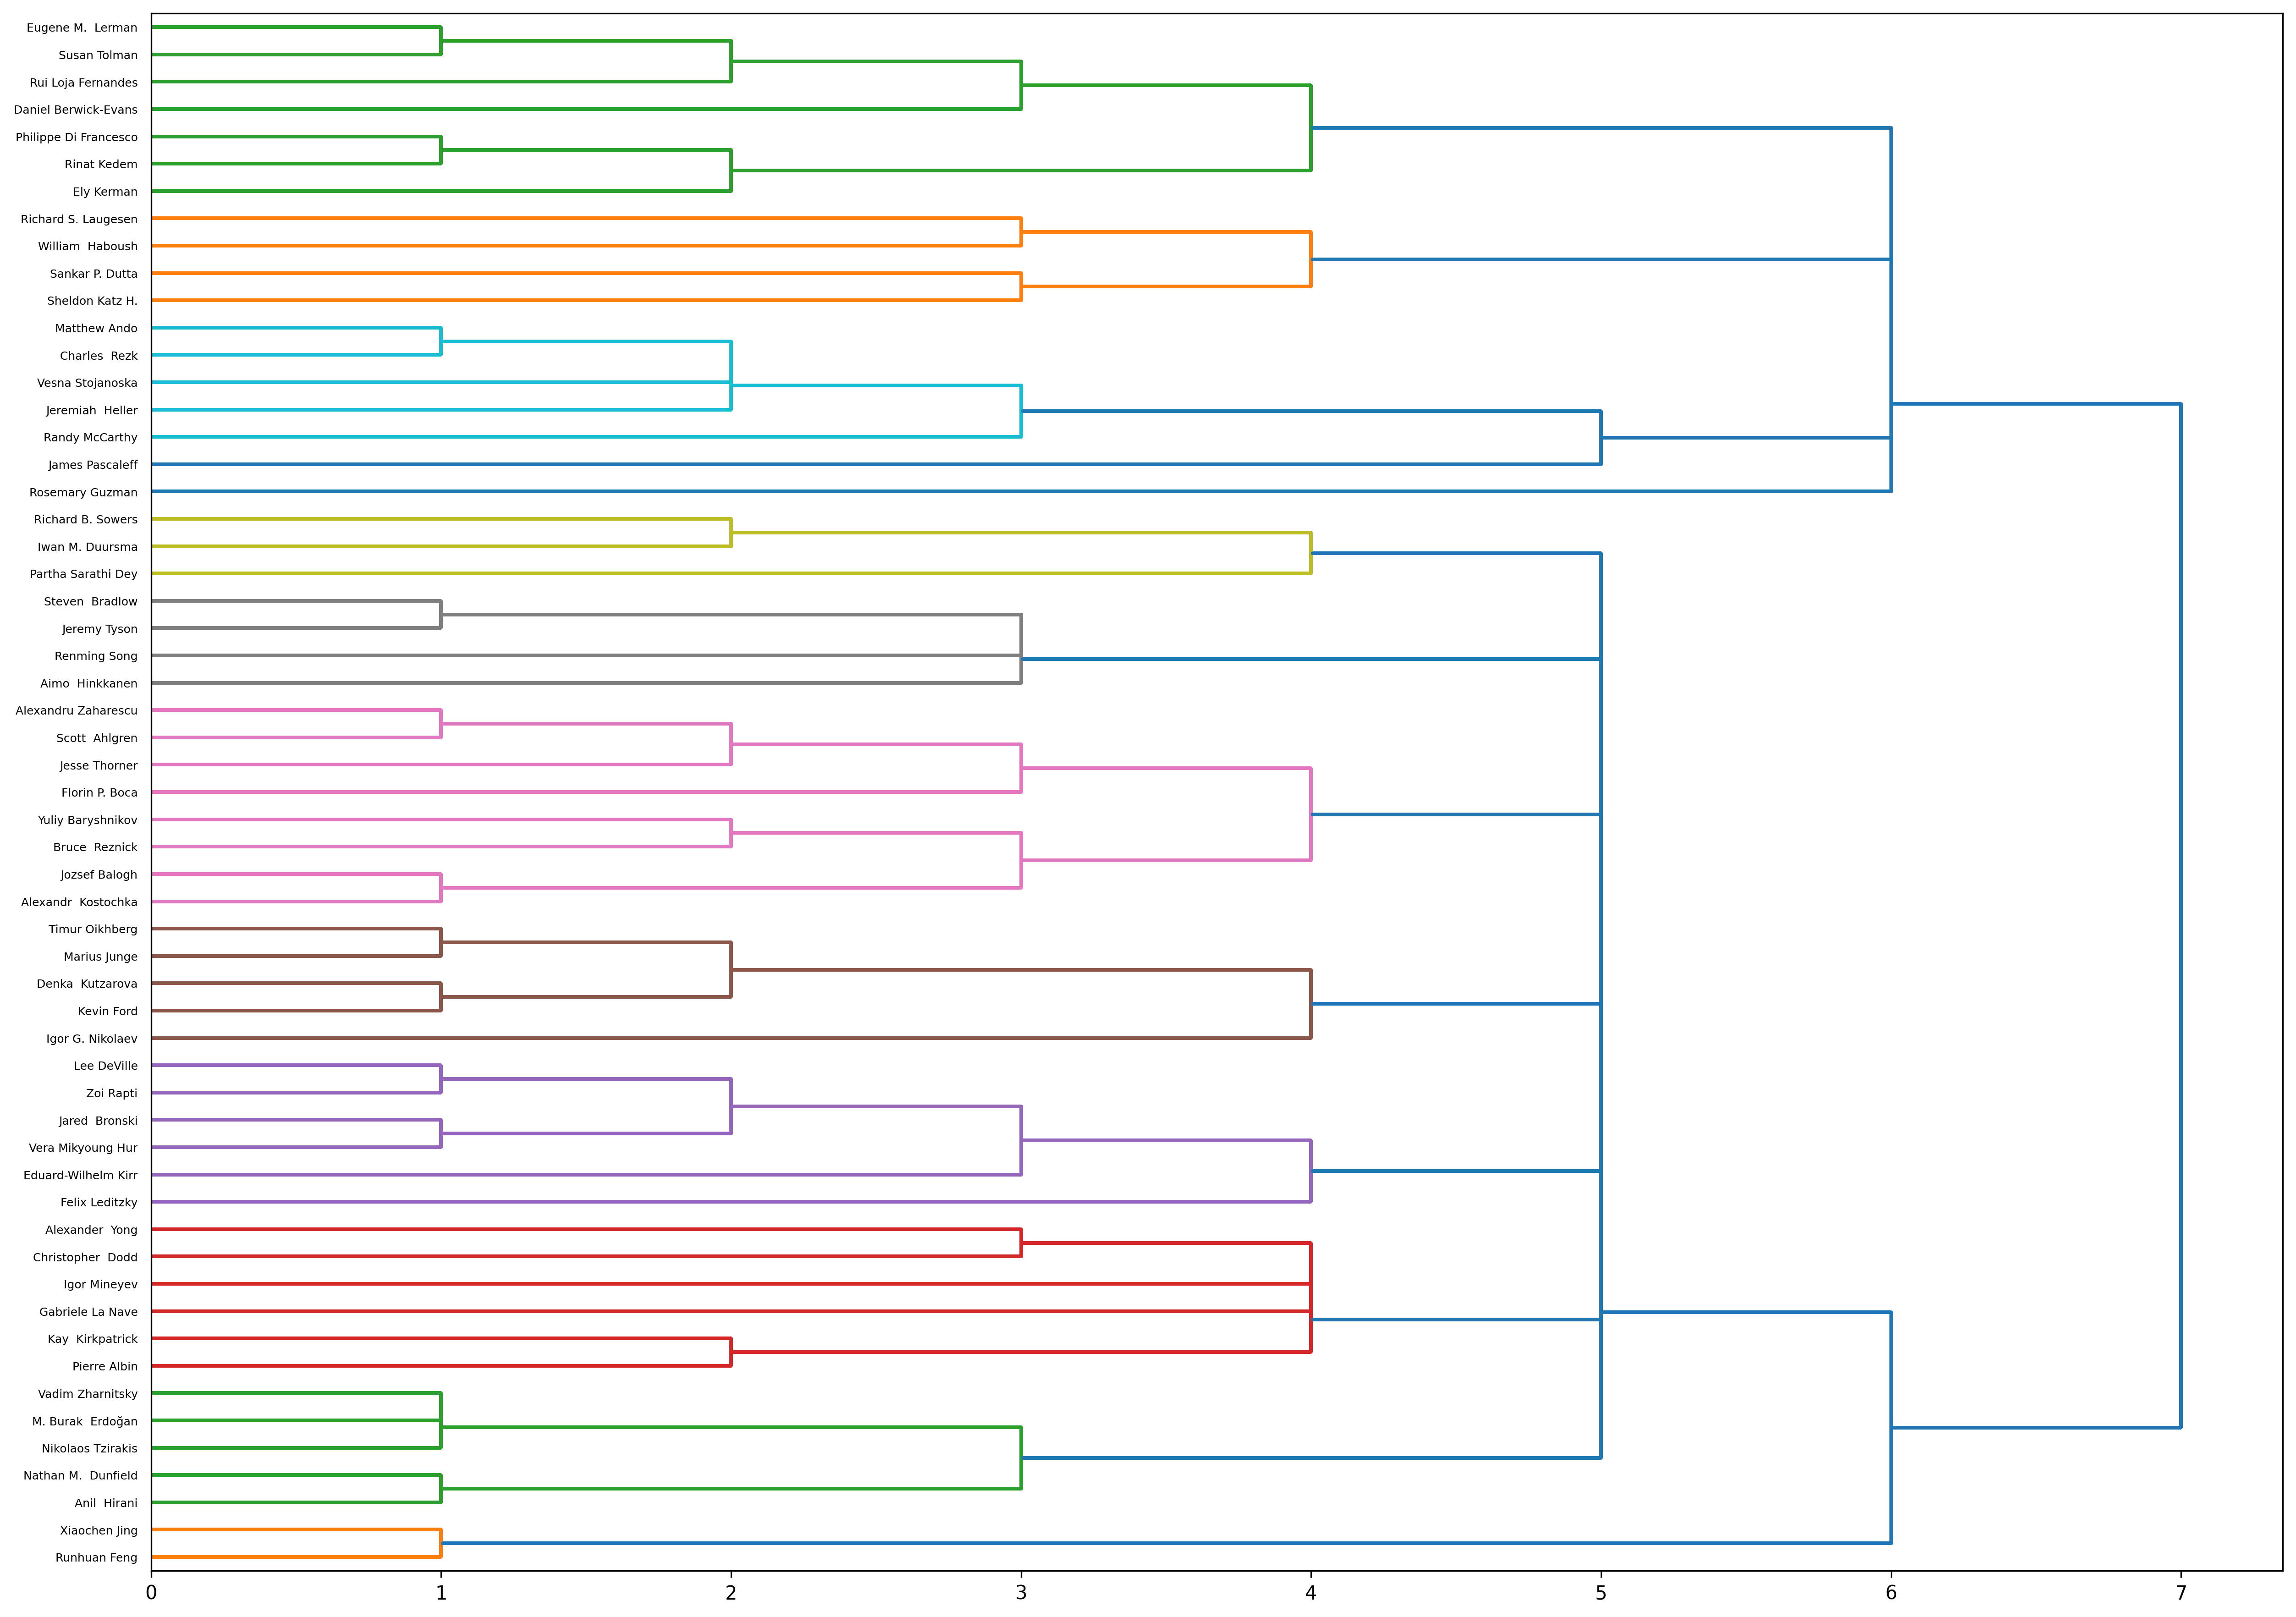

In [8]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='complete', compute_distances=True)
cl.fit(distance_mat)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass
plt.savefig("single_linkage.png")

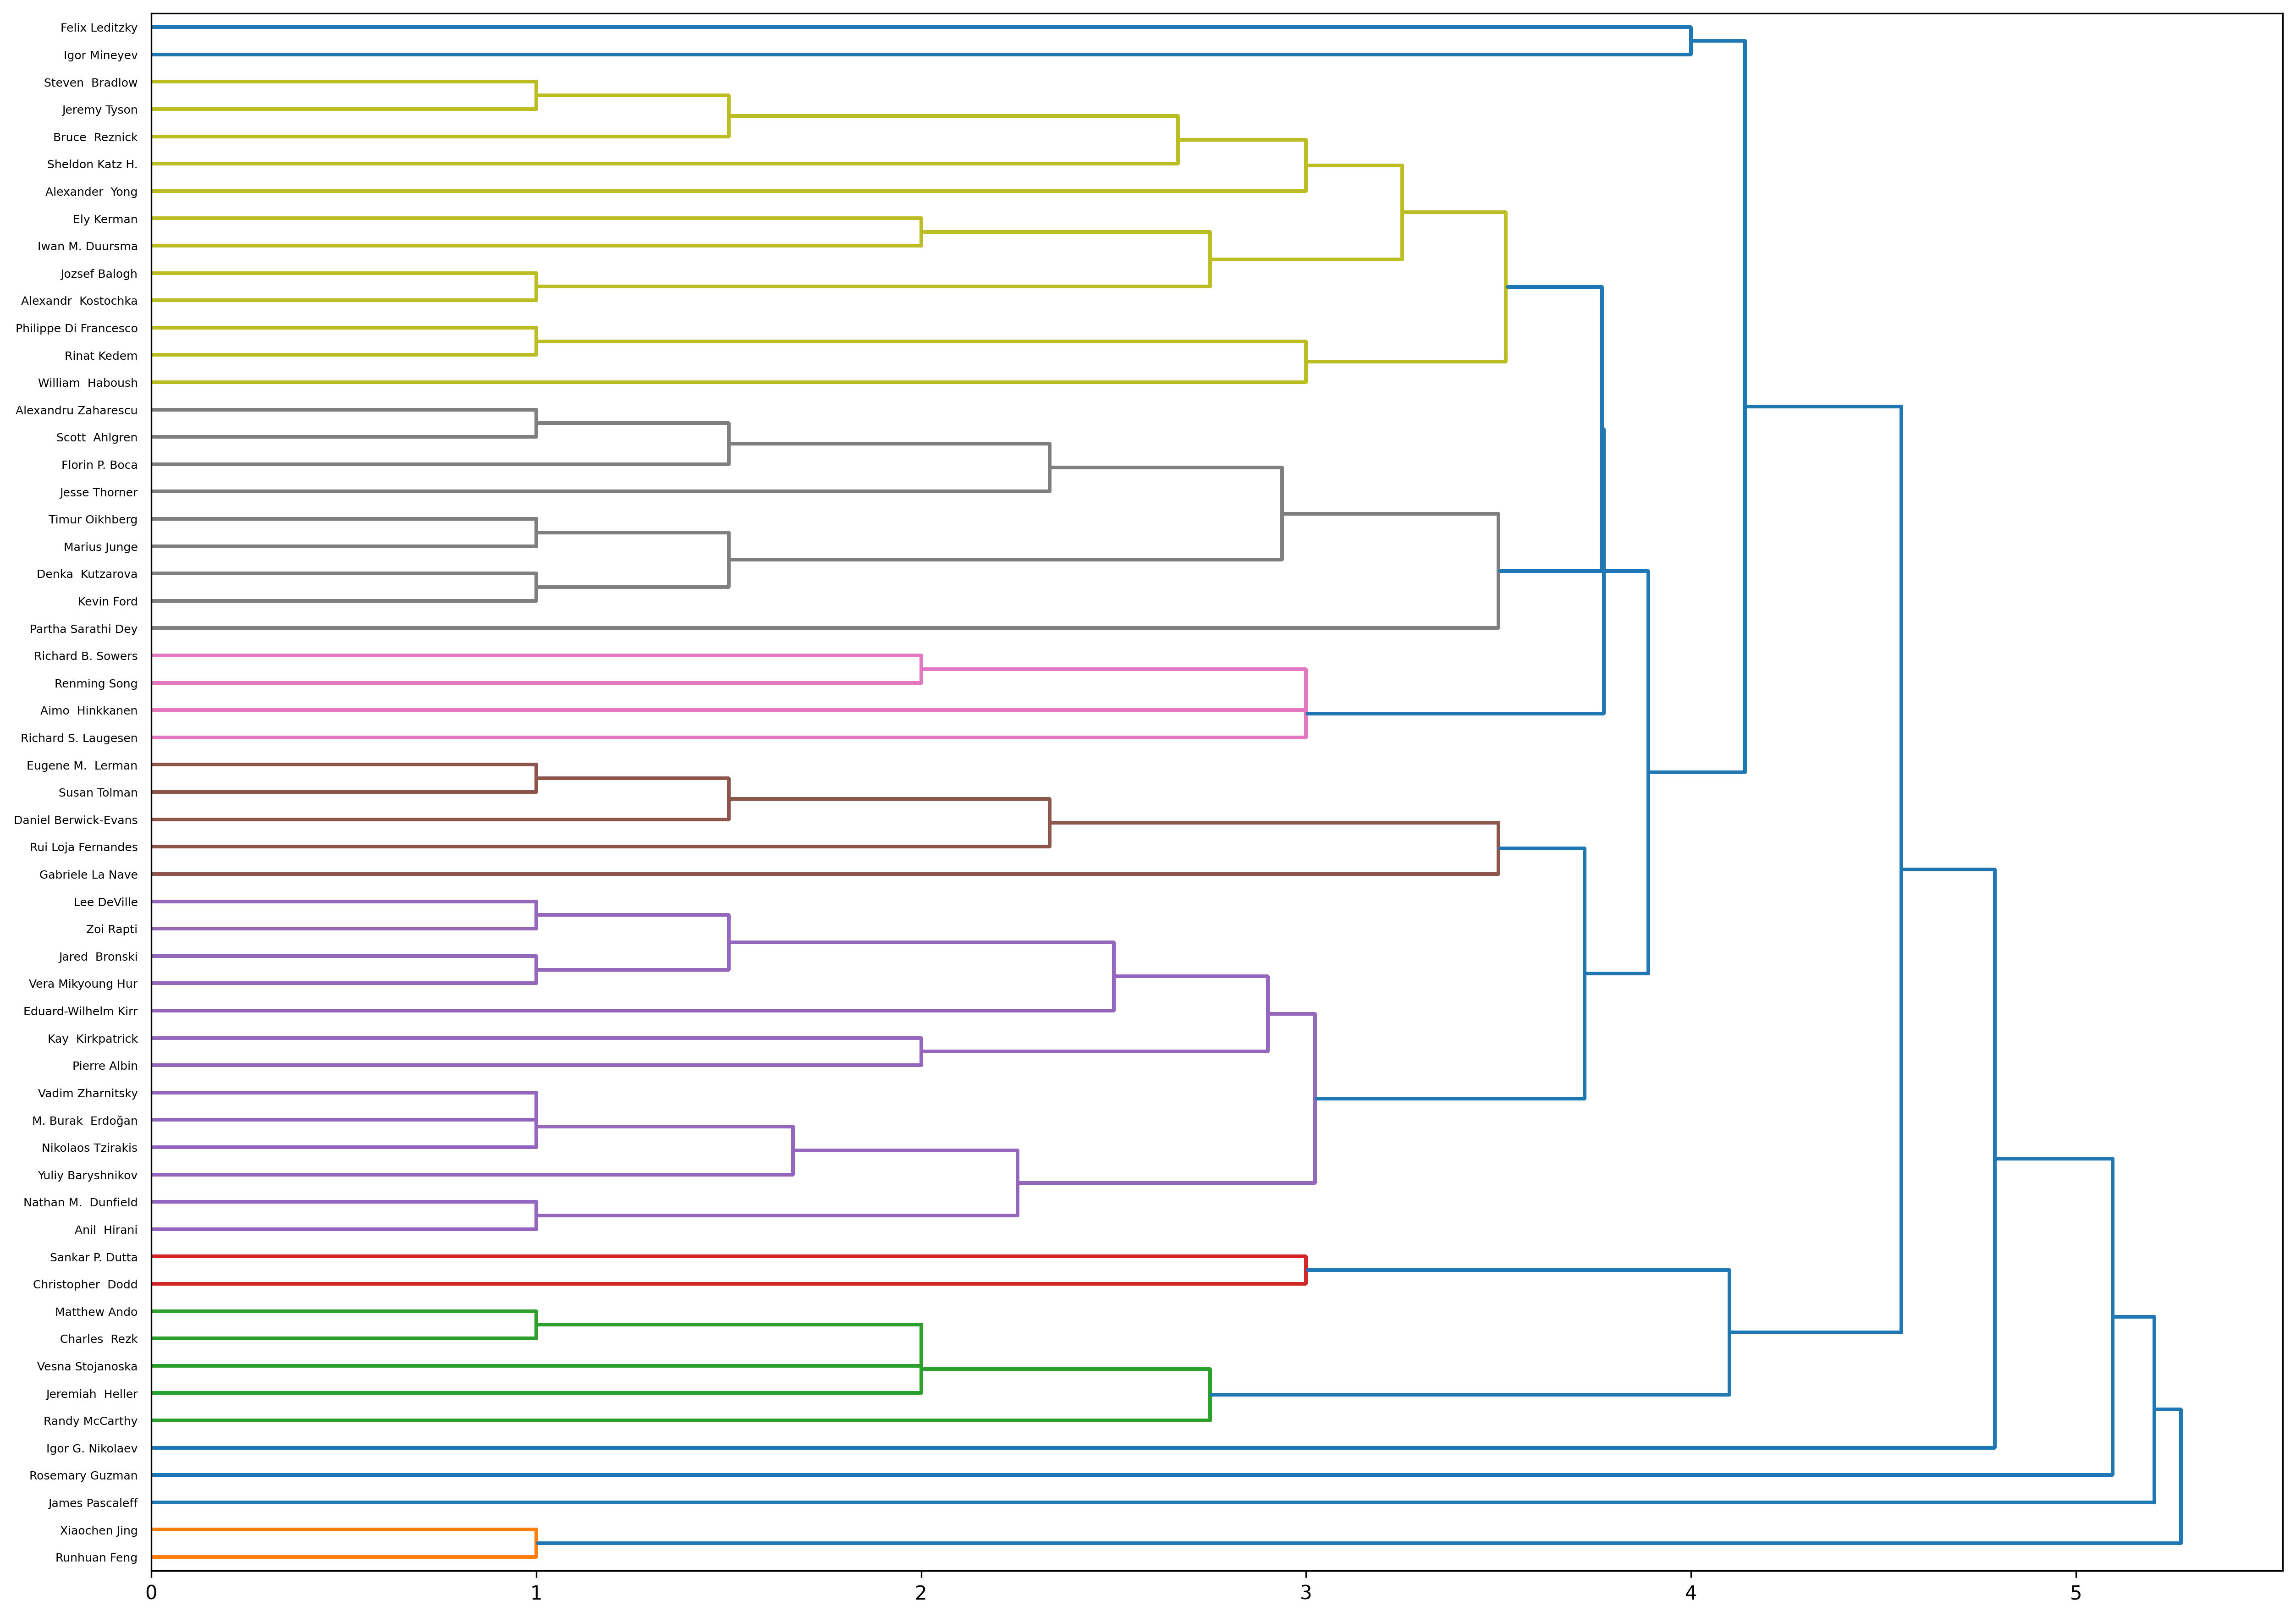

In [9]:
# Average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='average', compute_distances=True)
cl.fit(distance_mat)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)


# Clustering with # of joint publication

In [20]:
with open("joint_publication.json") as file:
    joint_pub = ujson.load(file)

In [11]:
# Construct similarity matrix and distance matrix
num_ppl = len(faculties)
similarity_joint = np.zeros((num_ppl, num_ppl))
i = 0
j = 1
for key, val in joint_pub.items():
    similarity_joint[i, j] = val
    j += 1
    if j == num_ppl:
        i += 1
        j = i + 1
        pass
    pass

similarity_joint += similarity_joint.T
distance_joint = 1 / np.power(1.5, similarity_joint)
np.fill_diagonal(distance_joint, 0)

In [84]:
similarity_joint[similarity_joint != 0]

array([ 7.,  1.,  1.,  2.,  1., 11., 12.,  2.,  1.,  8.,  1.,  1.,  1.,
        1.,  3., 11.,  7.,  1.,  2.,  1.,  6.,  2.,  1.,  1.,  1.,  3.,
        6.,  2.,  1.,  2.,  8., 12.])

### Dendrogram of different linkages (using joint publication number)

In [13]:
truncate_level = -1        # Draw dendrogram with at most "truncate_level" levels. (-1 to show the complete dendrogram)
kwarg = {"truncate_mode": "level", "p": truncate_level, "orientation": "right", "labels": faculties}

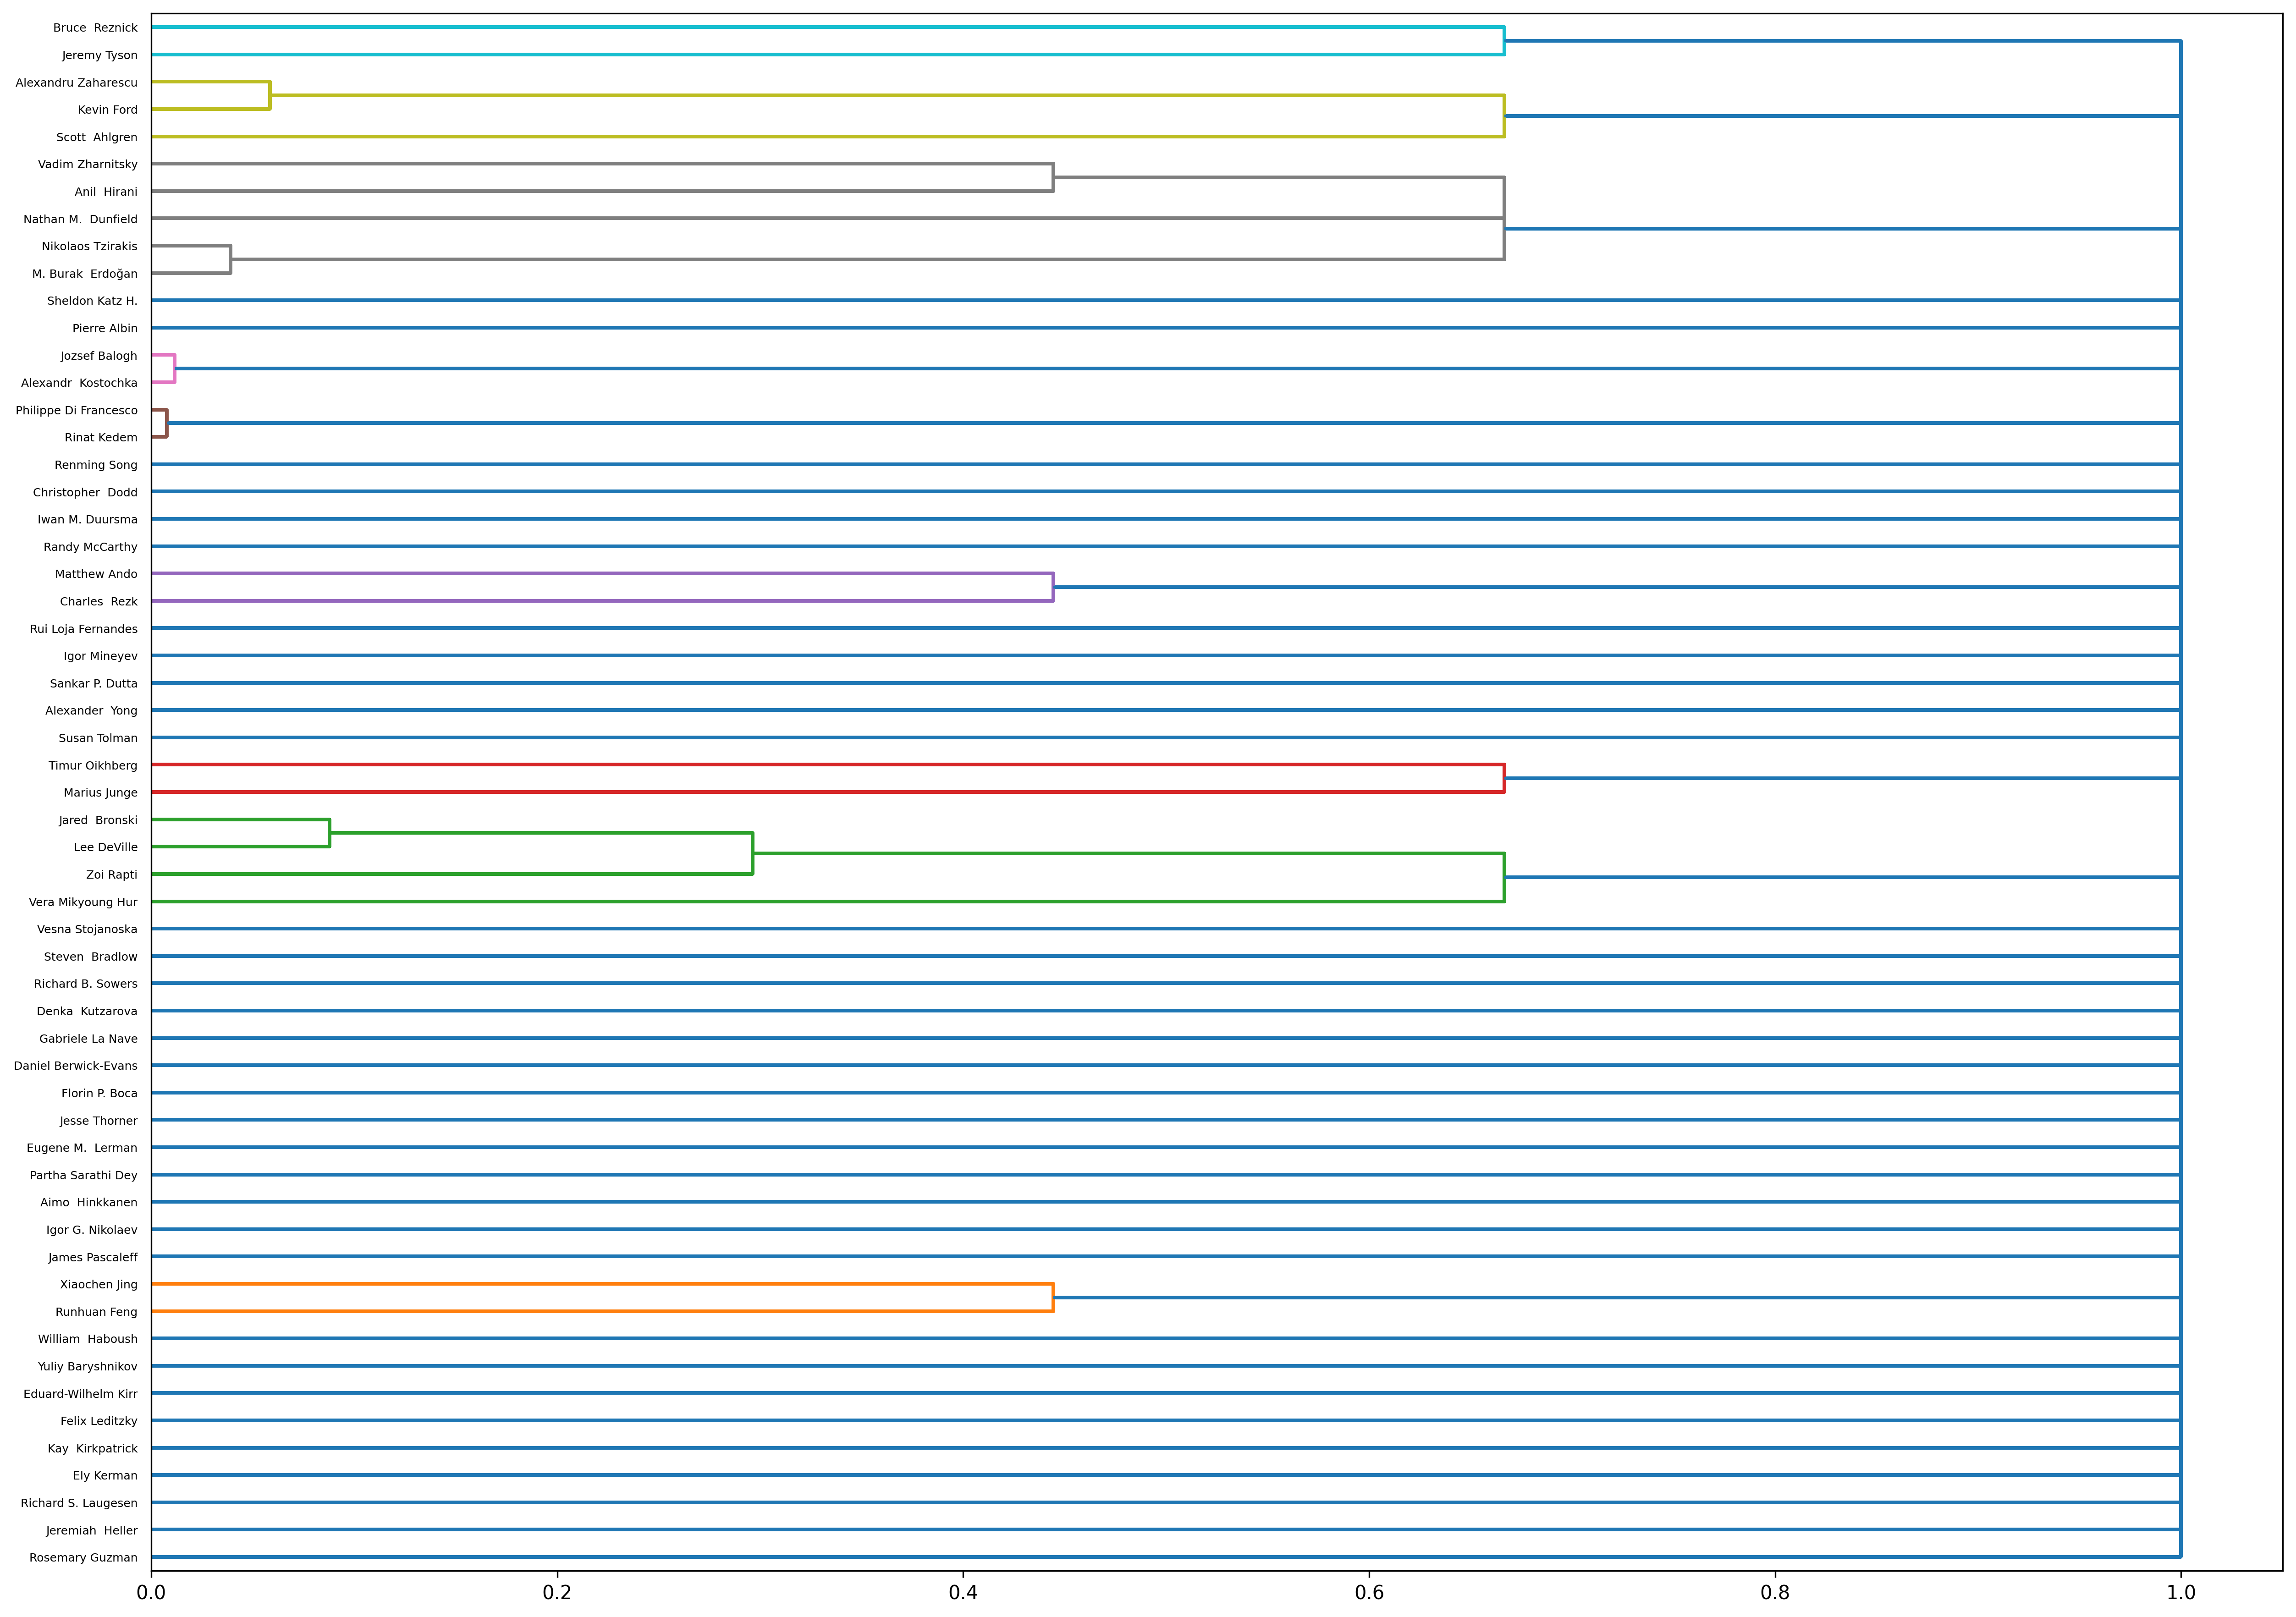

In [14]:
# Single
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='single', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass


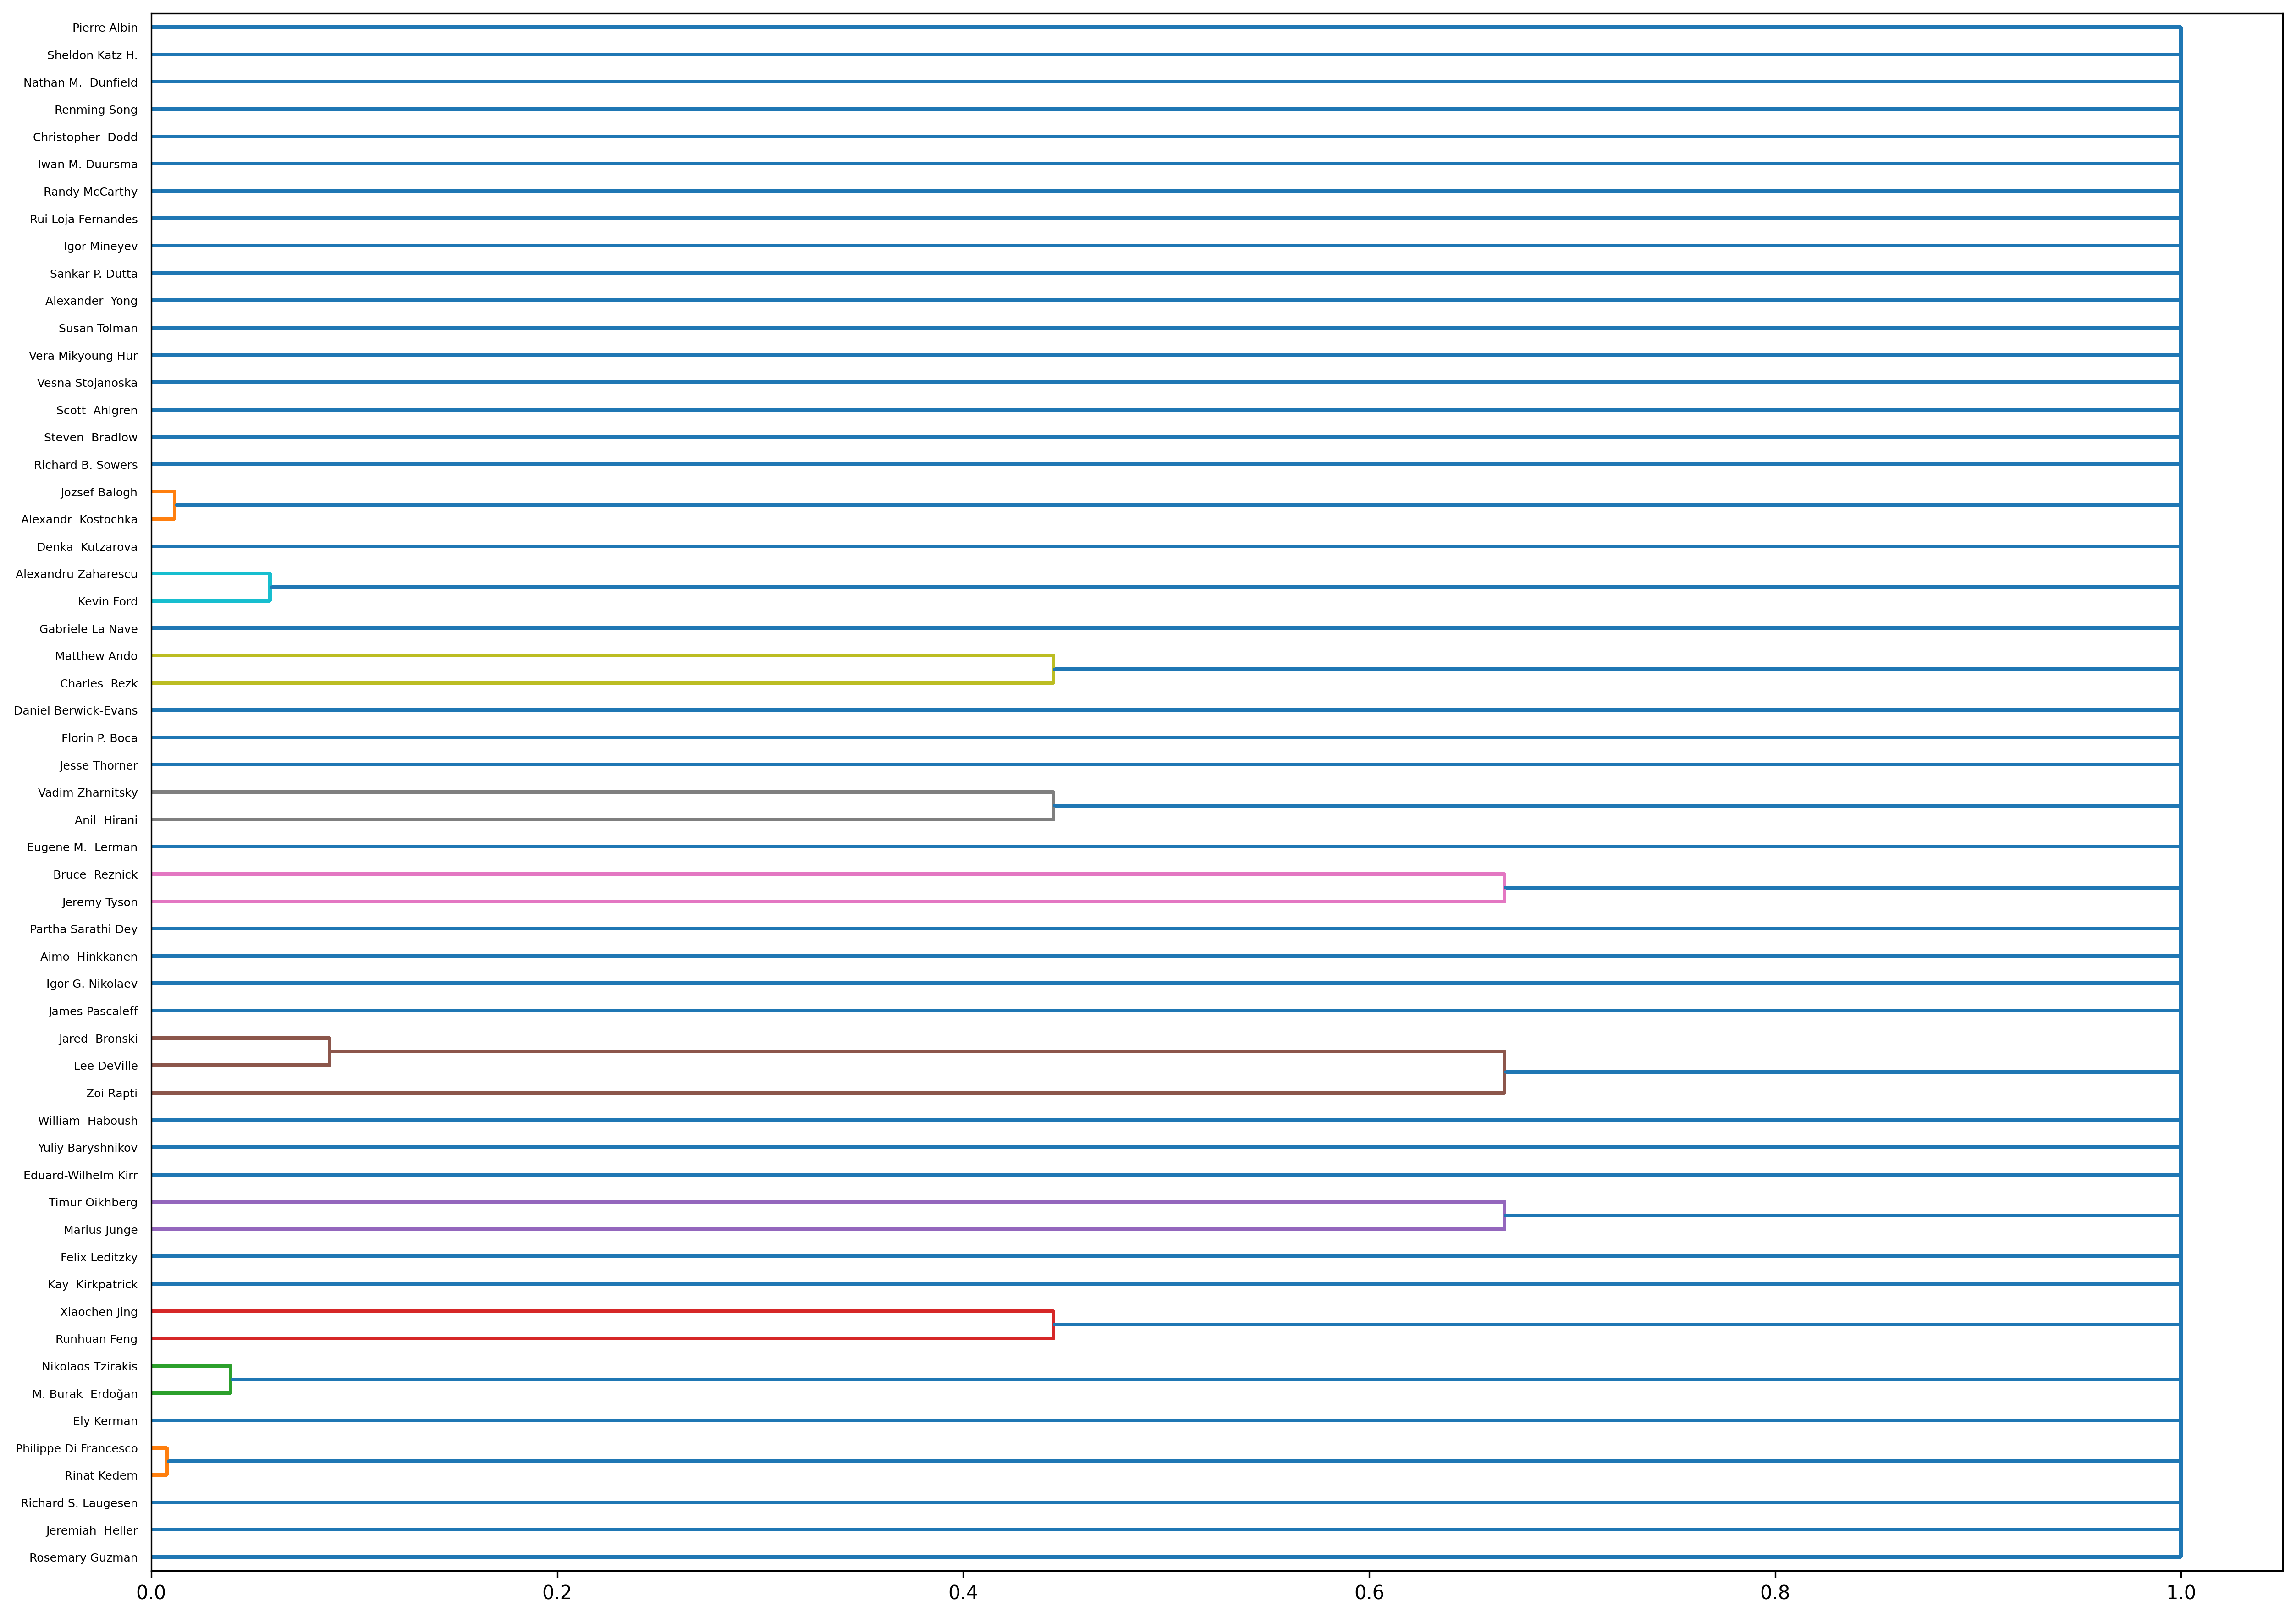

In [15]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='complete', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)
    pass


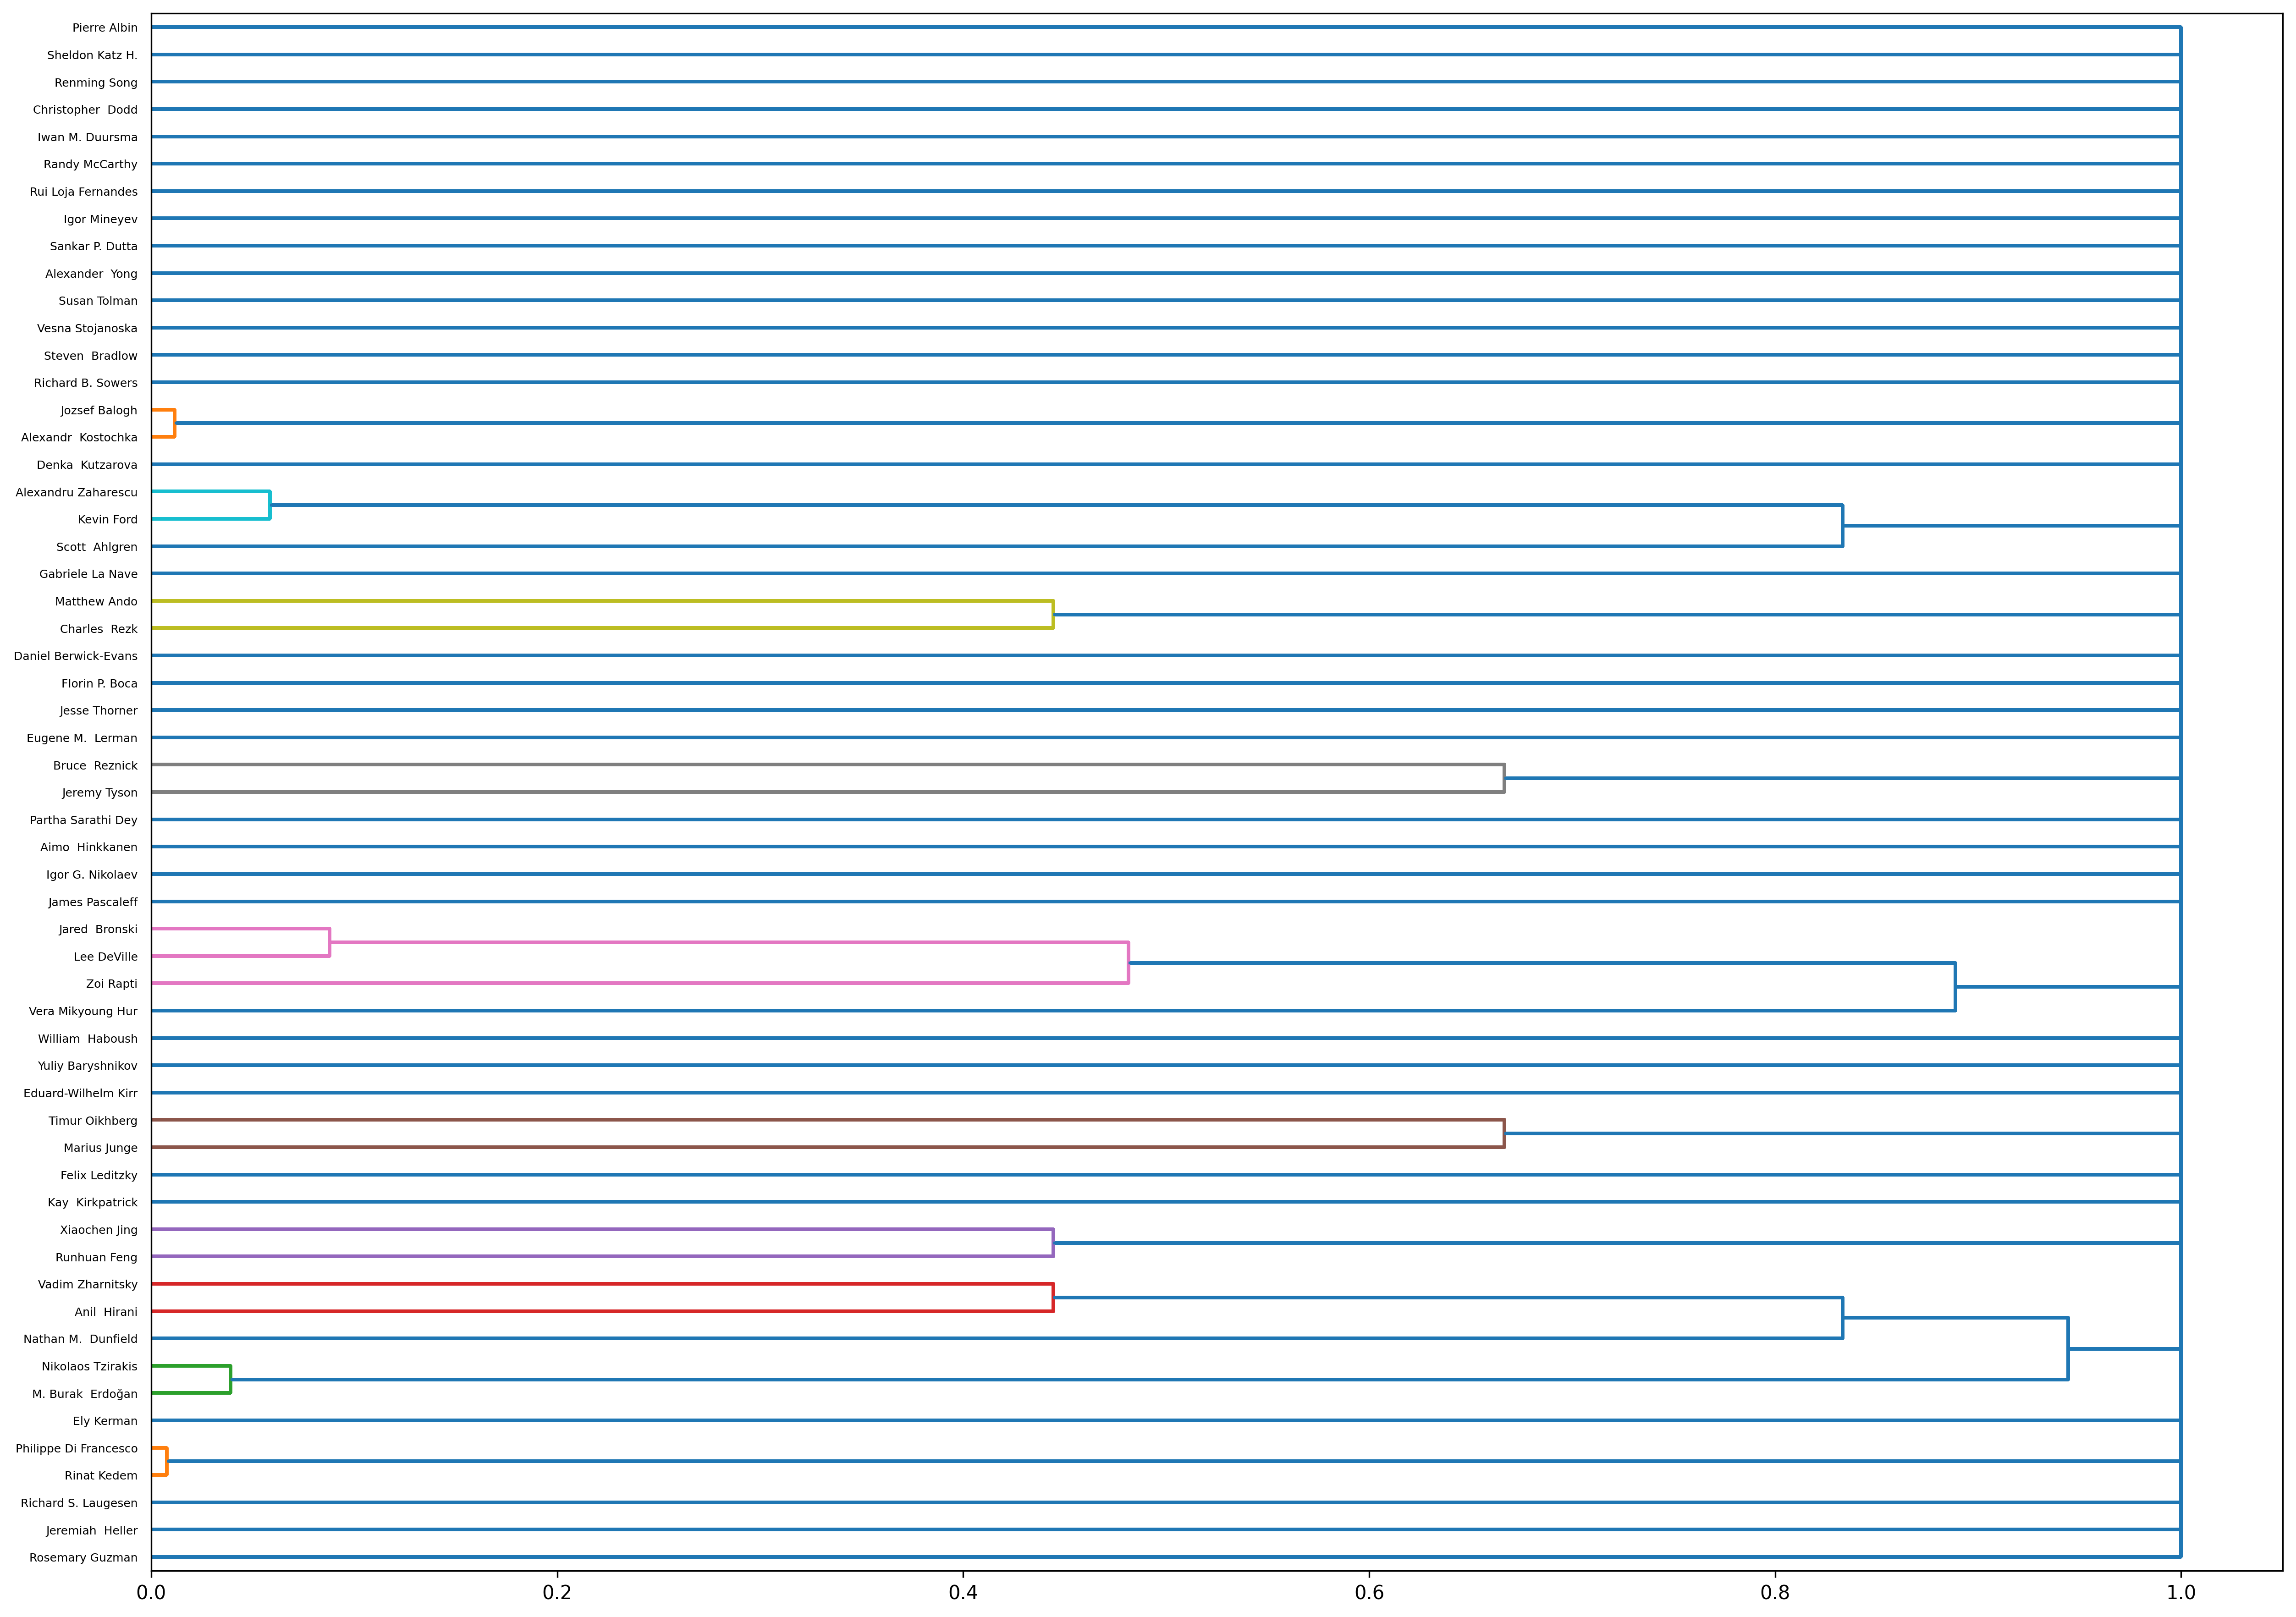

In [16]:
# Average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='precomputed',
                             compute_full_tree=True, linkage='average', compute_distances=True)
cl.fit(distance_joint)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
plt.figure(figsize=(20, 15), dpi=300)
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwarg)


# Clustering with # of shared citations

In [18]:
with open("citation_joint.json") as file:
    joint_citation = ujson.load(file)

In [96]:
# Construct similarity matrix and distance matrix
num_ppl = len(faculties)
similarity_citation = np.zeros((num_ppl, num_ppl))
i = 0
j = 1
for key, val in joint_citation.items():
    similarity_citation[i, j] = val
    if (val != 0):
        print(val)
    j += 1
    if j == num_ppl:
        i += 1
        j = i + 1
        pass
    pass

similarity_citation += similarity_citation
distance_citation = 1 / np.power(2, similarity_citation)
np.fill_diagonal(distance_citation, 0)

1
4
1
8
9
3
1
1
1
1
18
2
6
2
1
19
1
4


In [90]:
similarity_citation[similarity_citation != 0]

array([ 2.,  8.,  2., 16., 18.,  6.,  2.,  2.,  2.,  2., 36.,  4., 12.,
        4.,  2., 38.,  2.,  8.])

## Dendrograms

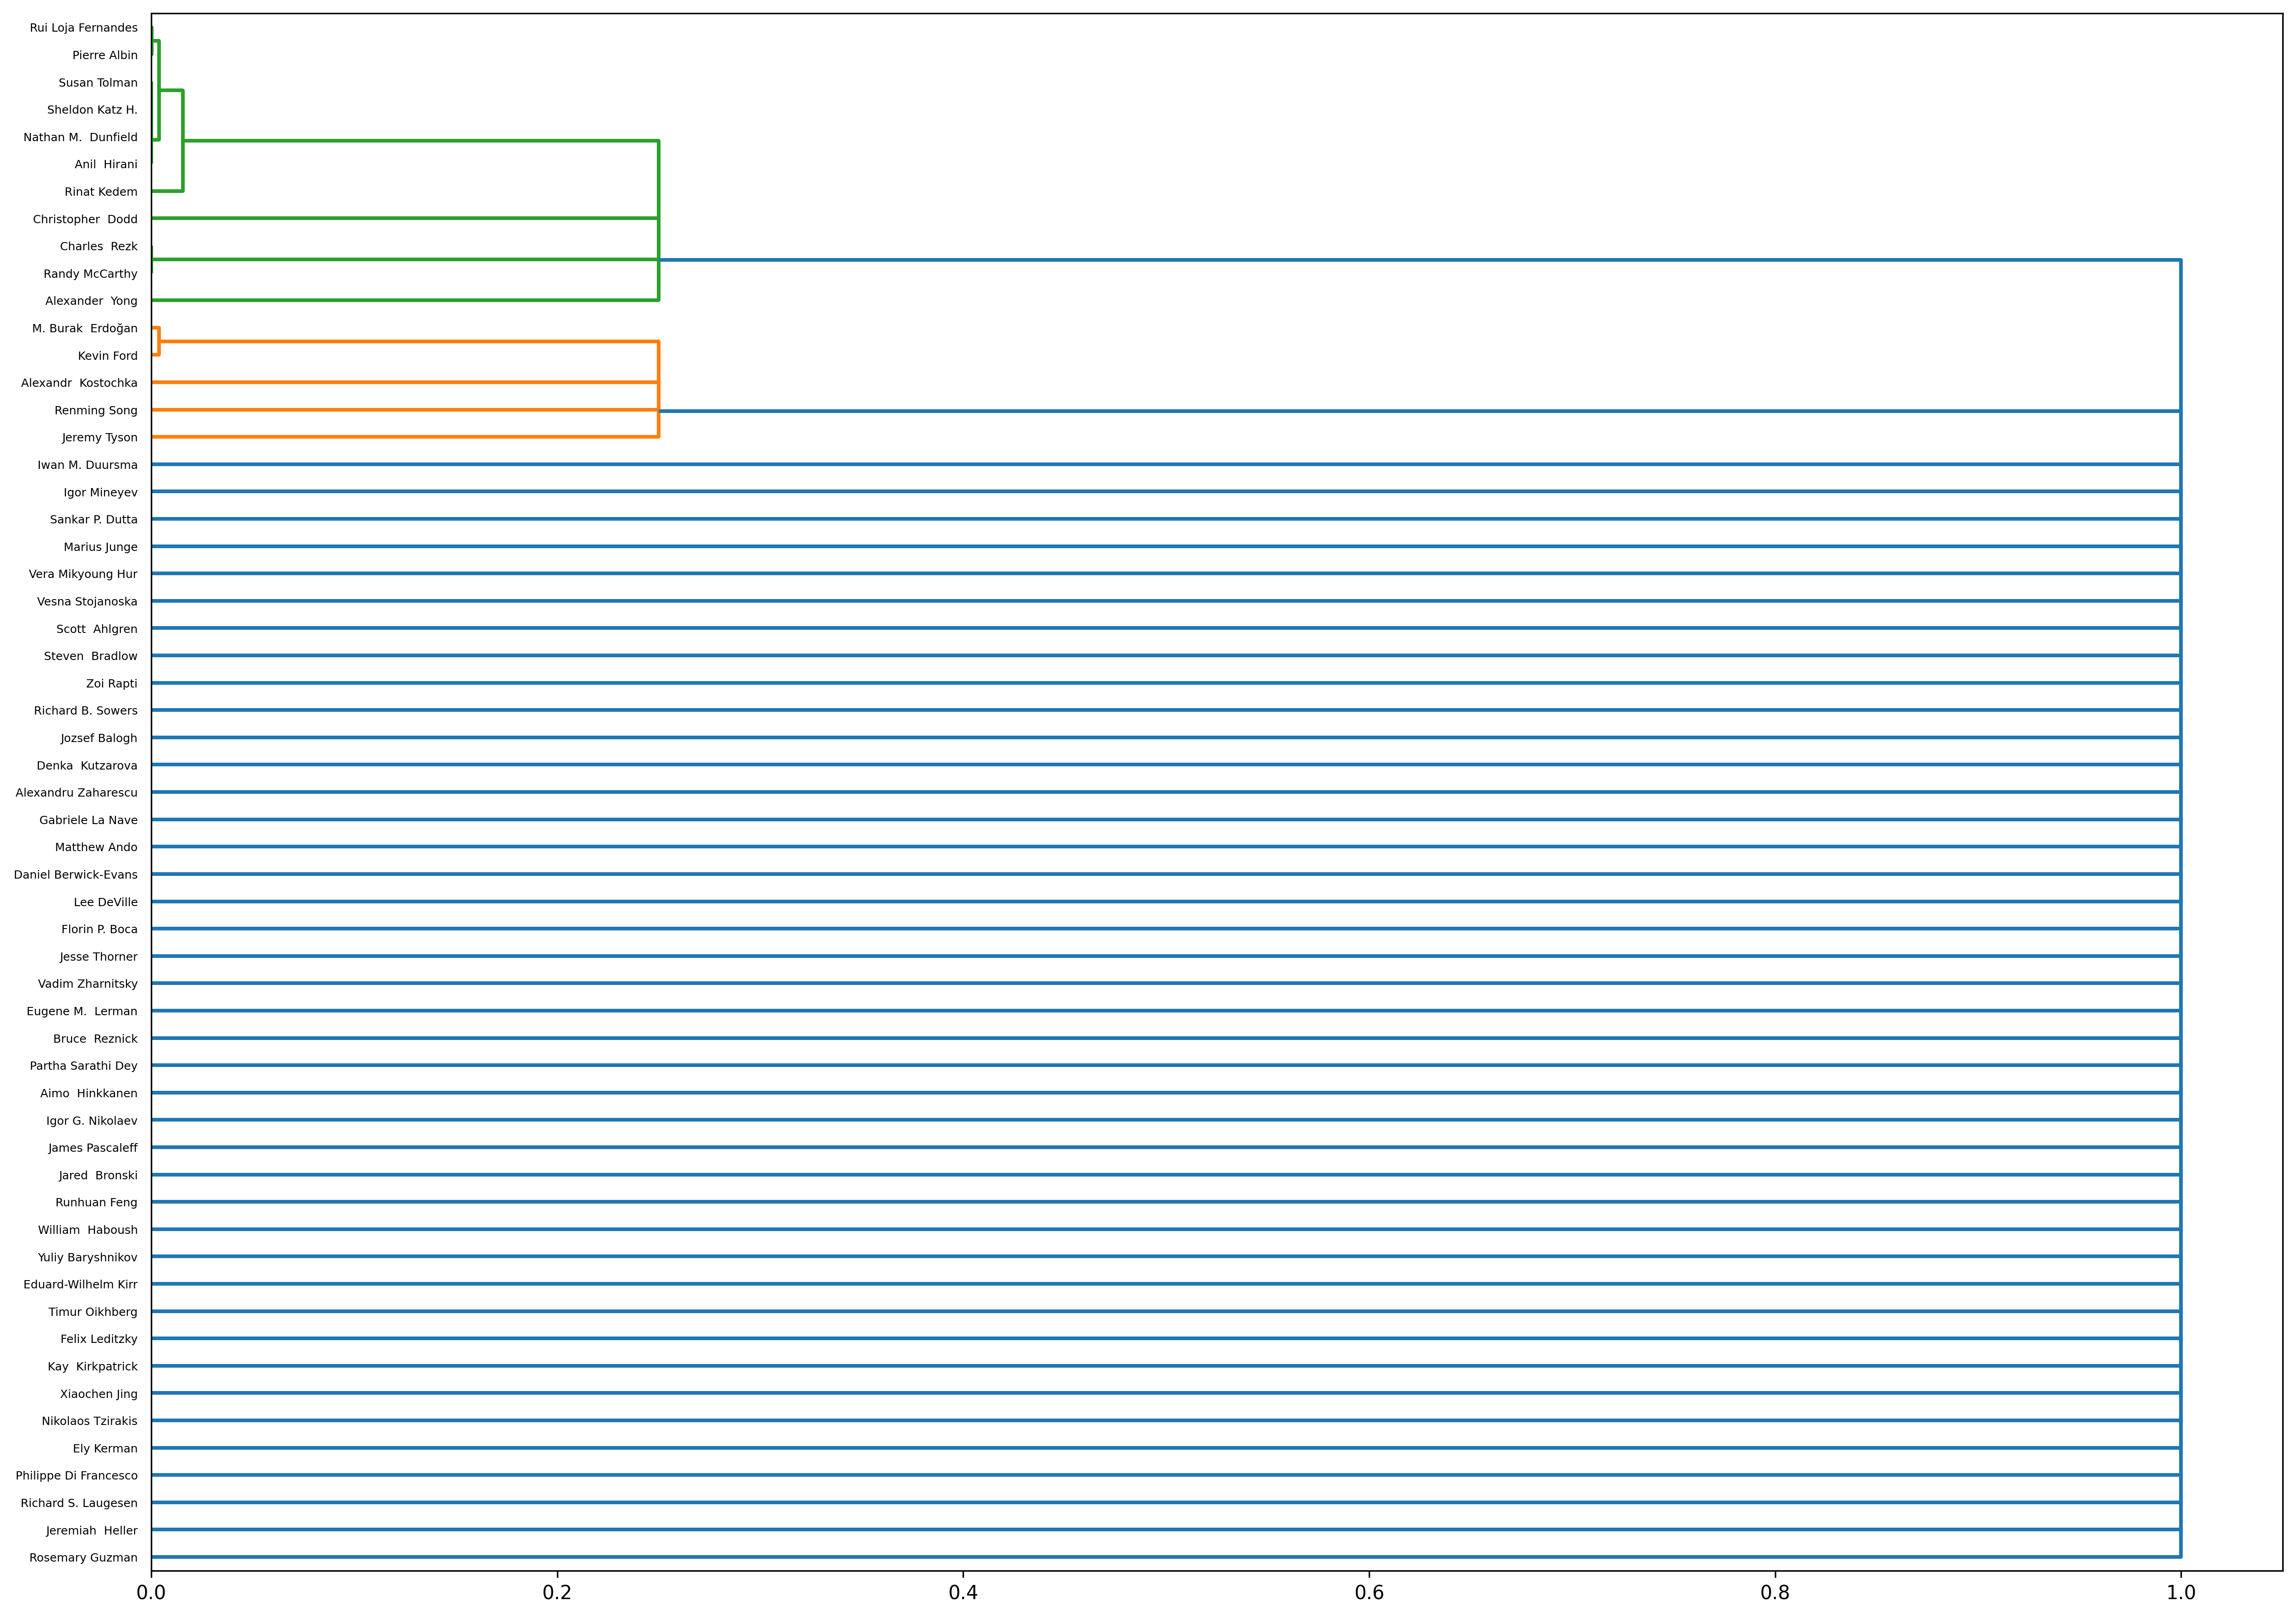

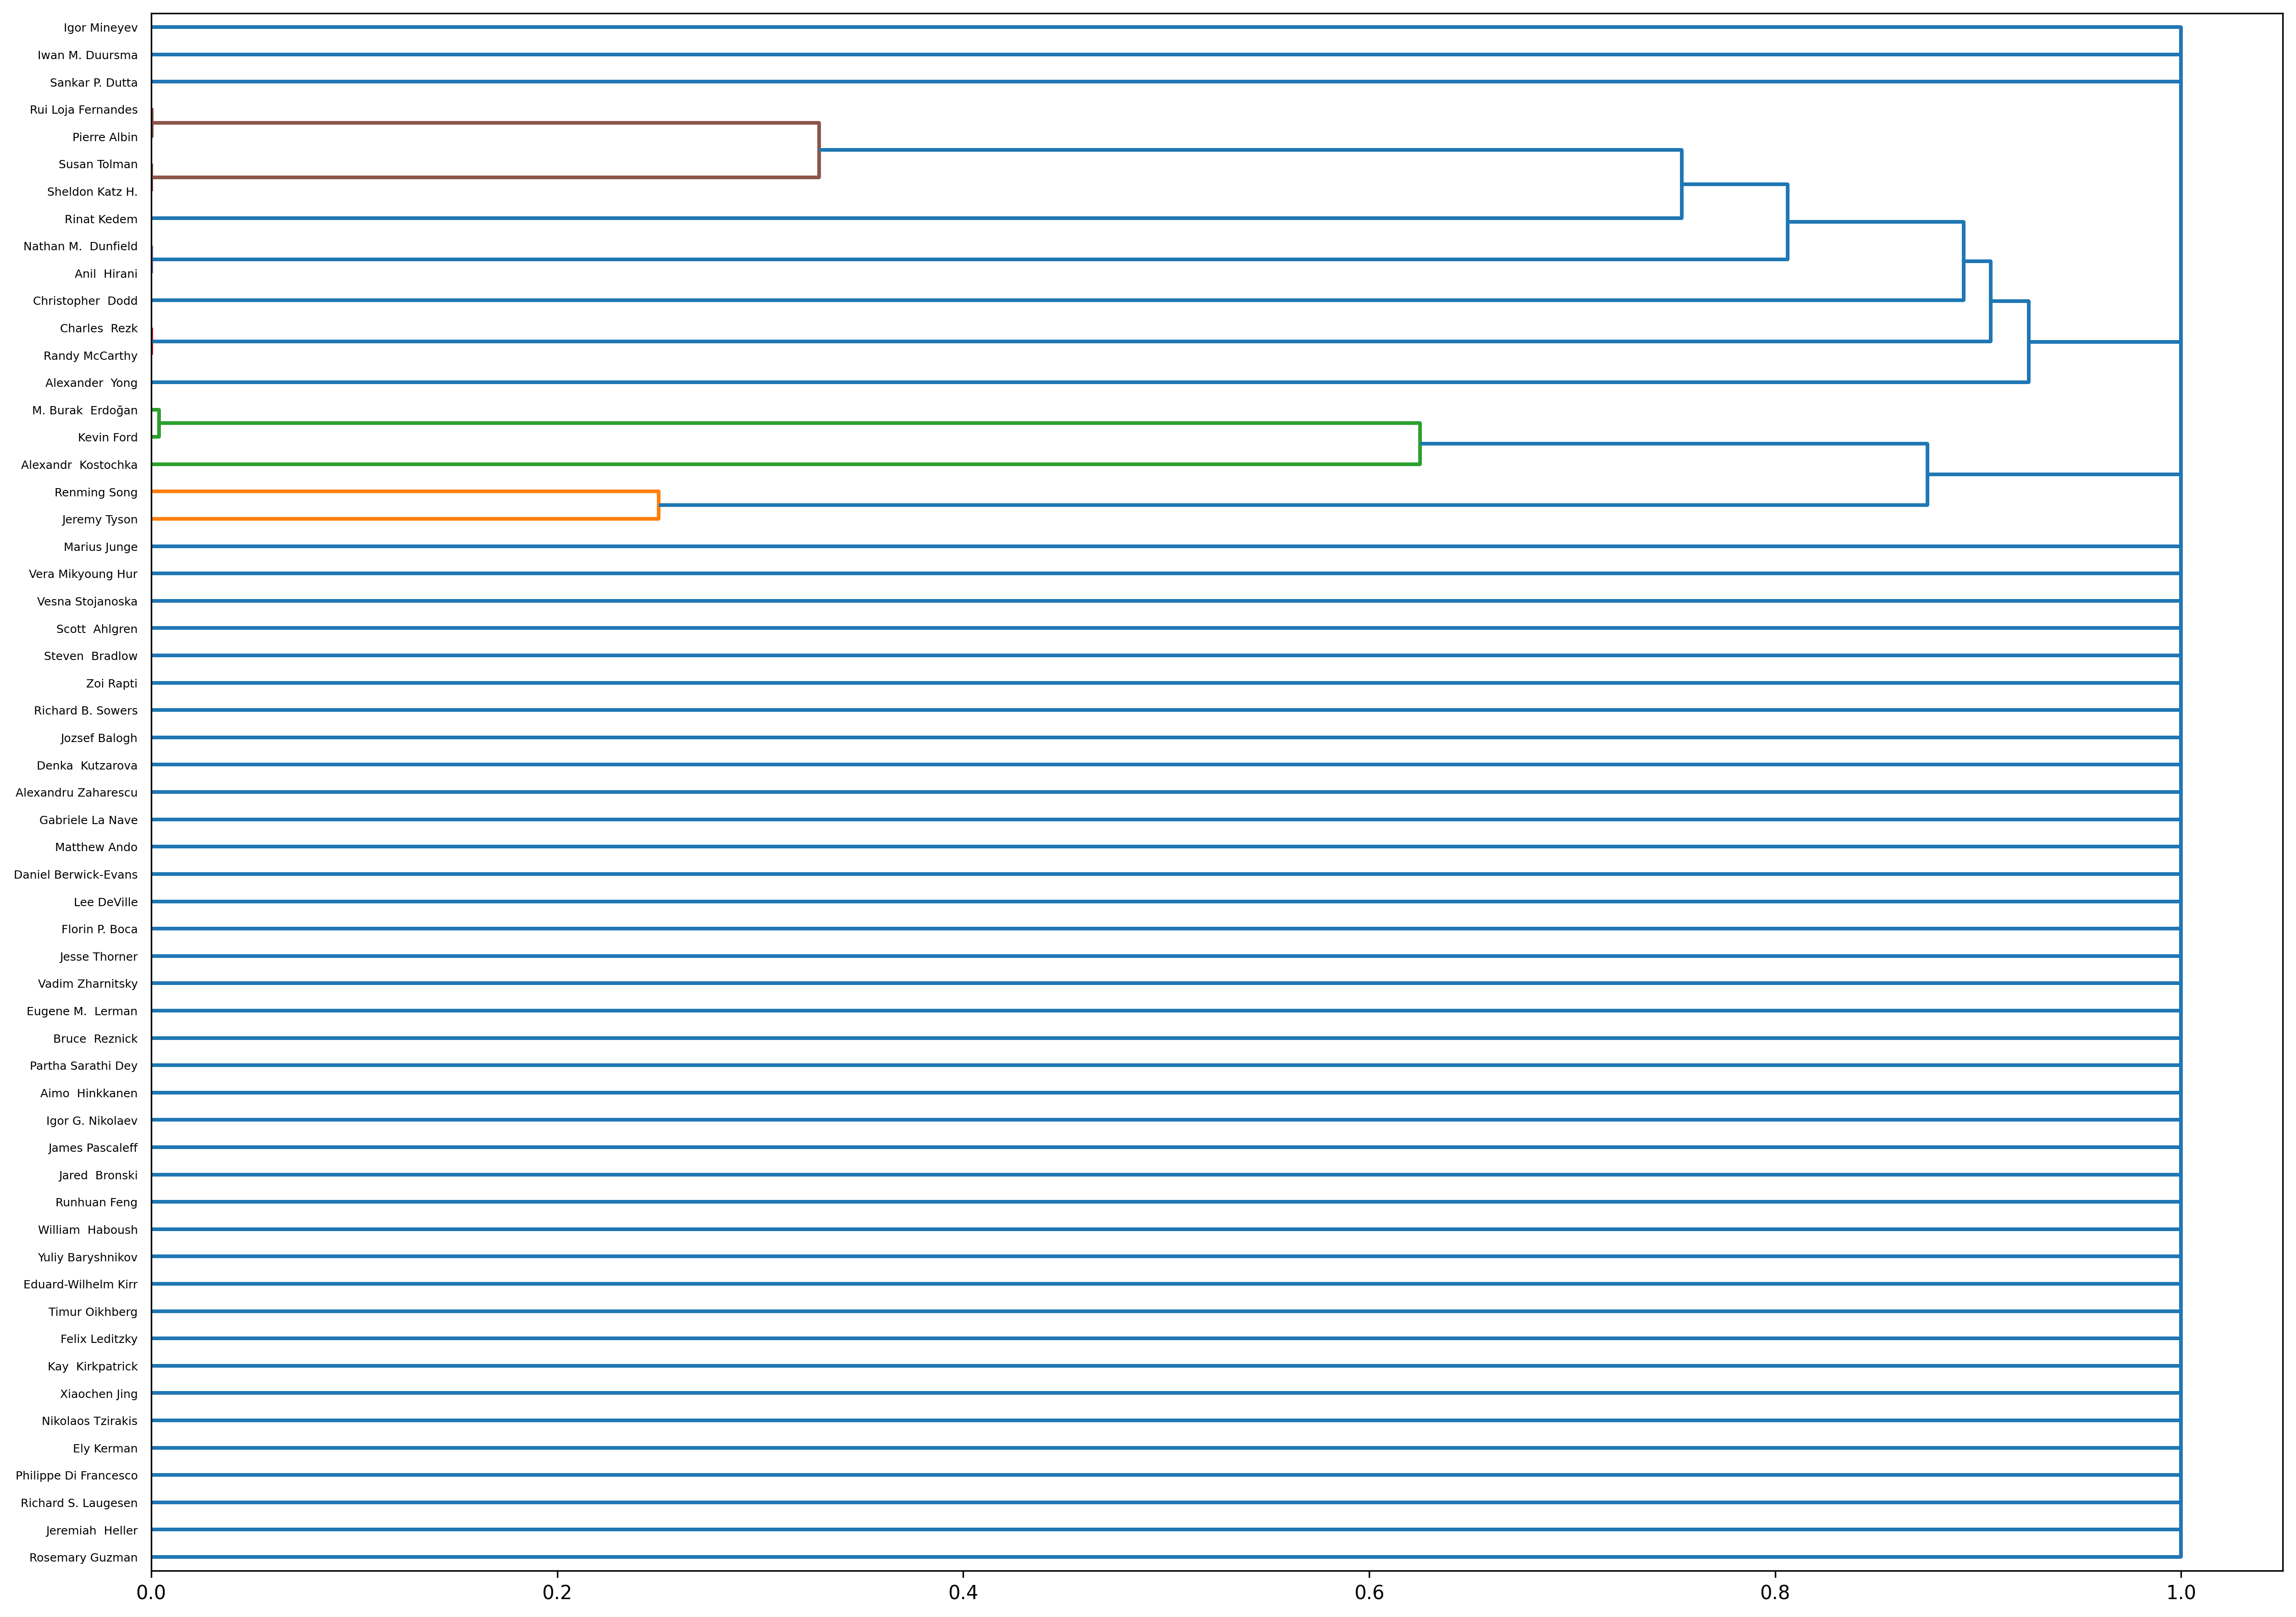

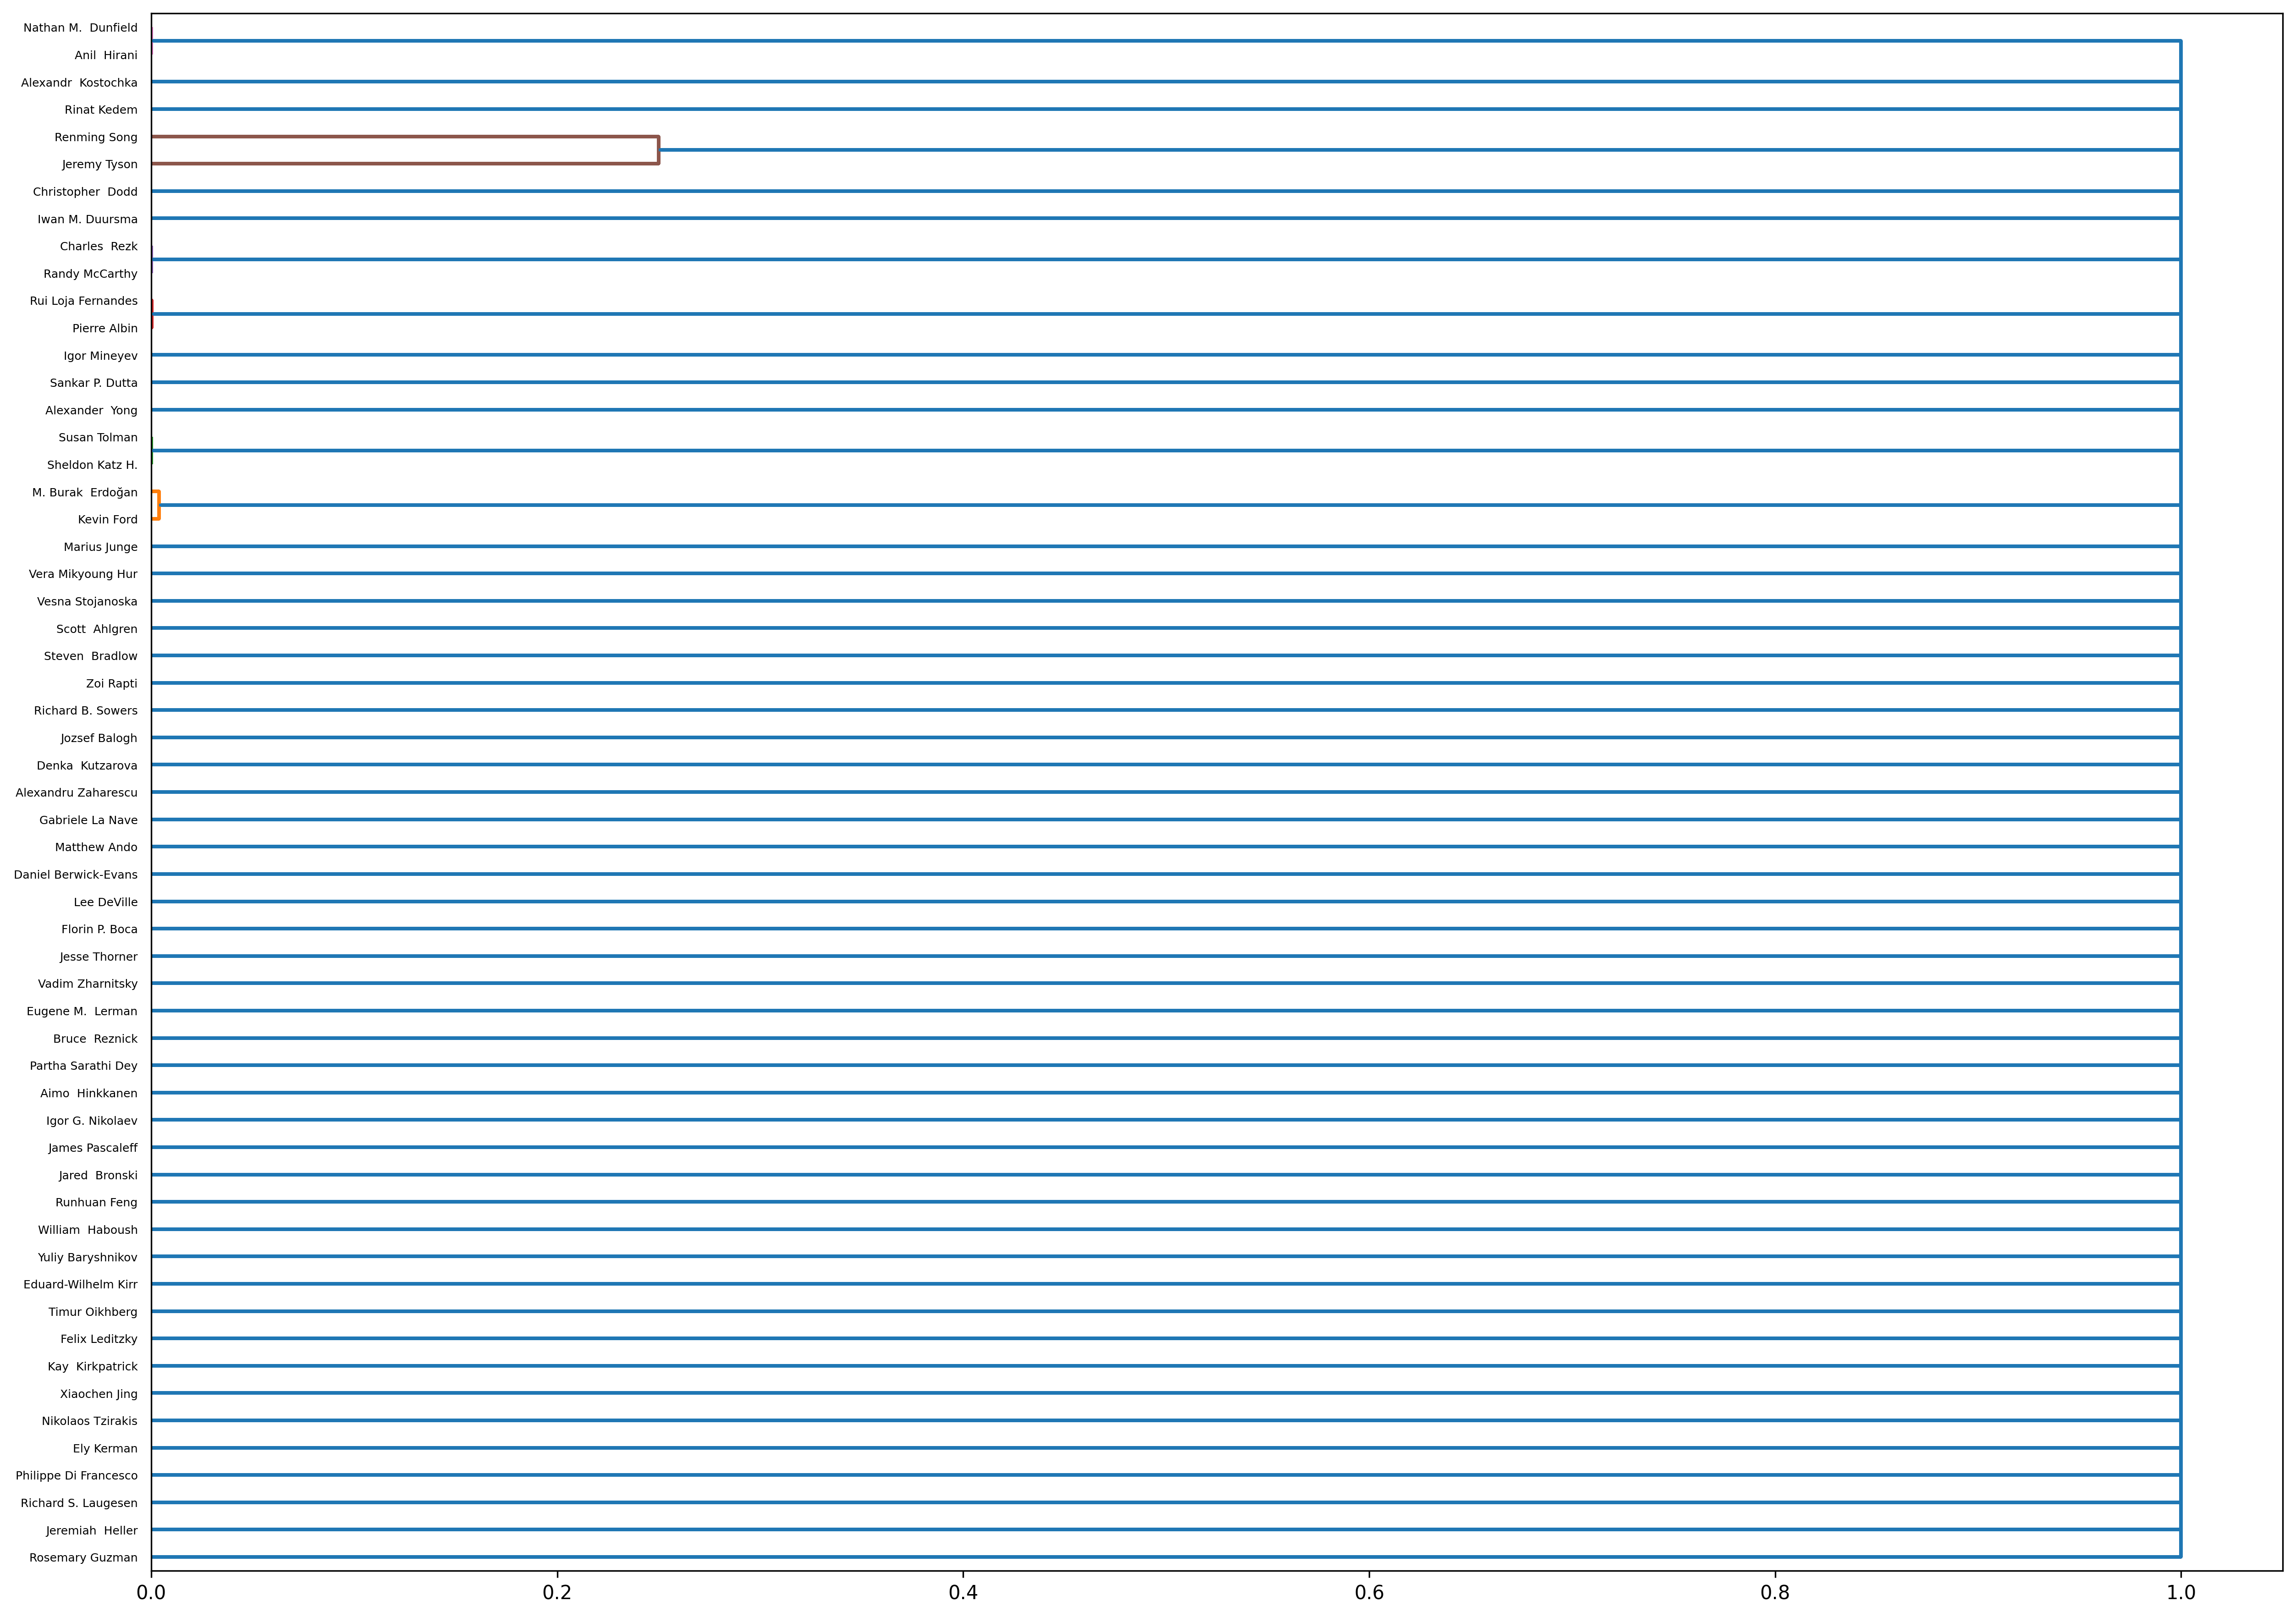

In [91]:
plot_dendrogram(distance_citation, faculties, linkage="single")
plot_dendrogram(distance_citation, faculties, linkage="average")
plot_dendrogram(distance_citation, faculties, linkage="complete")

# Clustering with # of directed citations

In [63]:
with open("citation_directed.json") as file:
    directed_citation = ujson.load(file)
    pass

In [95]:
# Construct similarity matrix and distance matrix
num_ppl = len(faculties)

i = 0
j = 0

for key, val in directed_citation.items():
    similarity_dir_citation[i, j] = val
    if (val != 0):
        print(val)
    j += 1
    if j == num_ppl:
        i += 1
        j = 0
        pass
    pass

similarity_dir_citation += similarity_dir_citation.T
distance_dir_citation = 1 / np.power(2, similarity_dir_citation)
np.fill_diagonal(distance_dir_citation, 0)

1
1
1
1
1
1
1
2


In [93]:
similarity_dir_citation[similarity_dir_citation != 0]

array([1., 1., 1., 2., 1., 1., 1., 1., 2., 1., 2., 1., 2., 1., 2.])

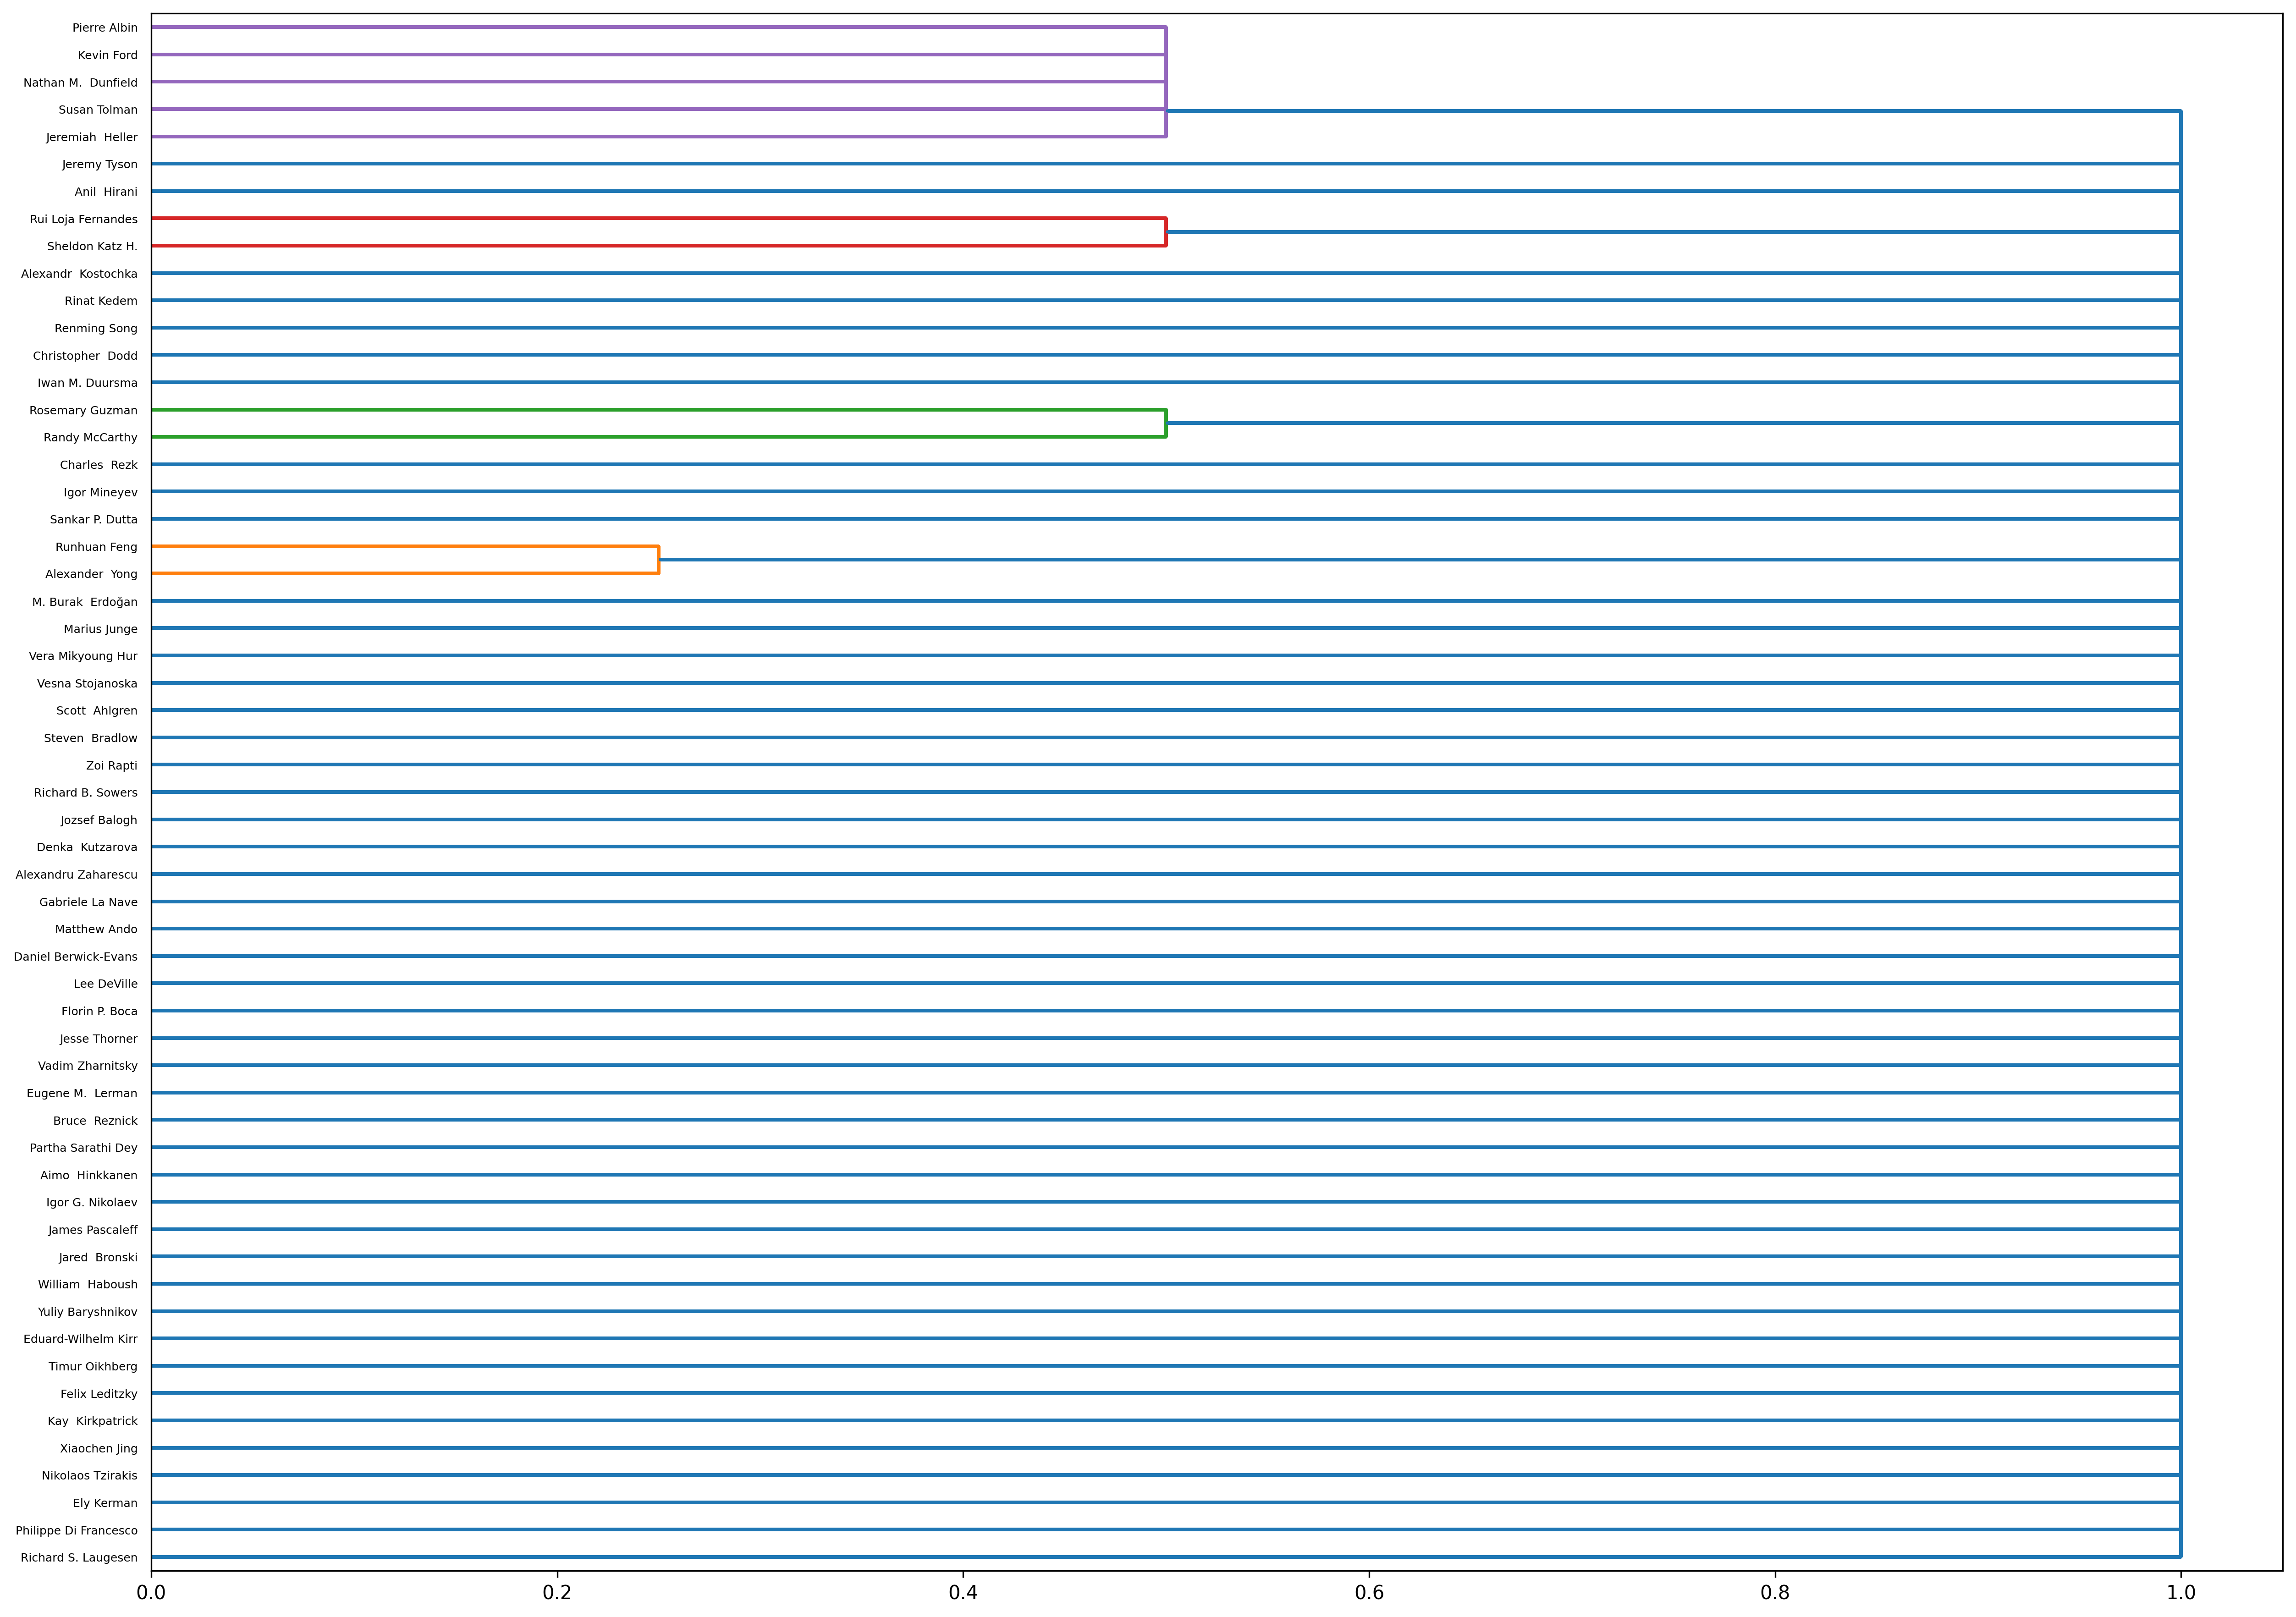

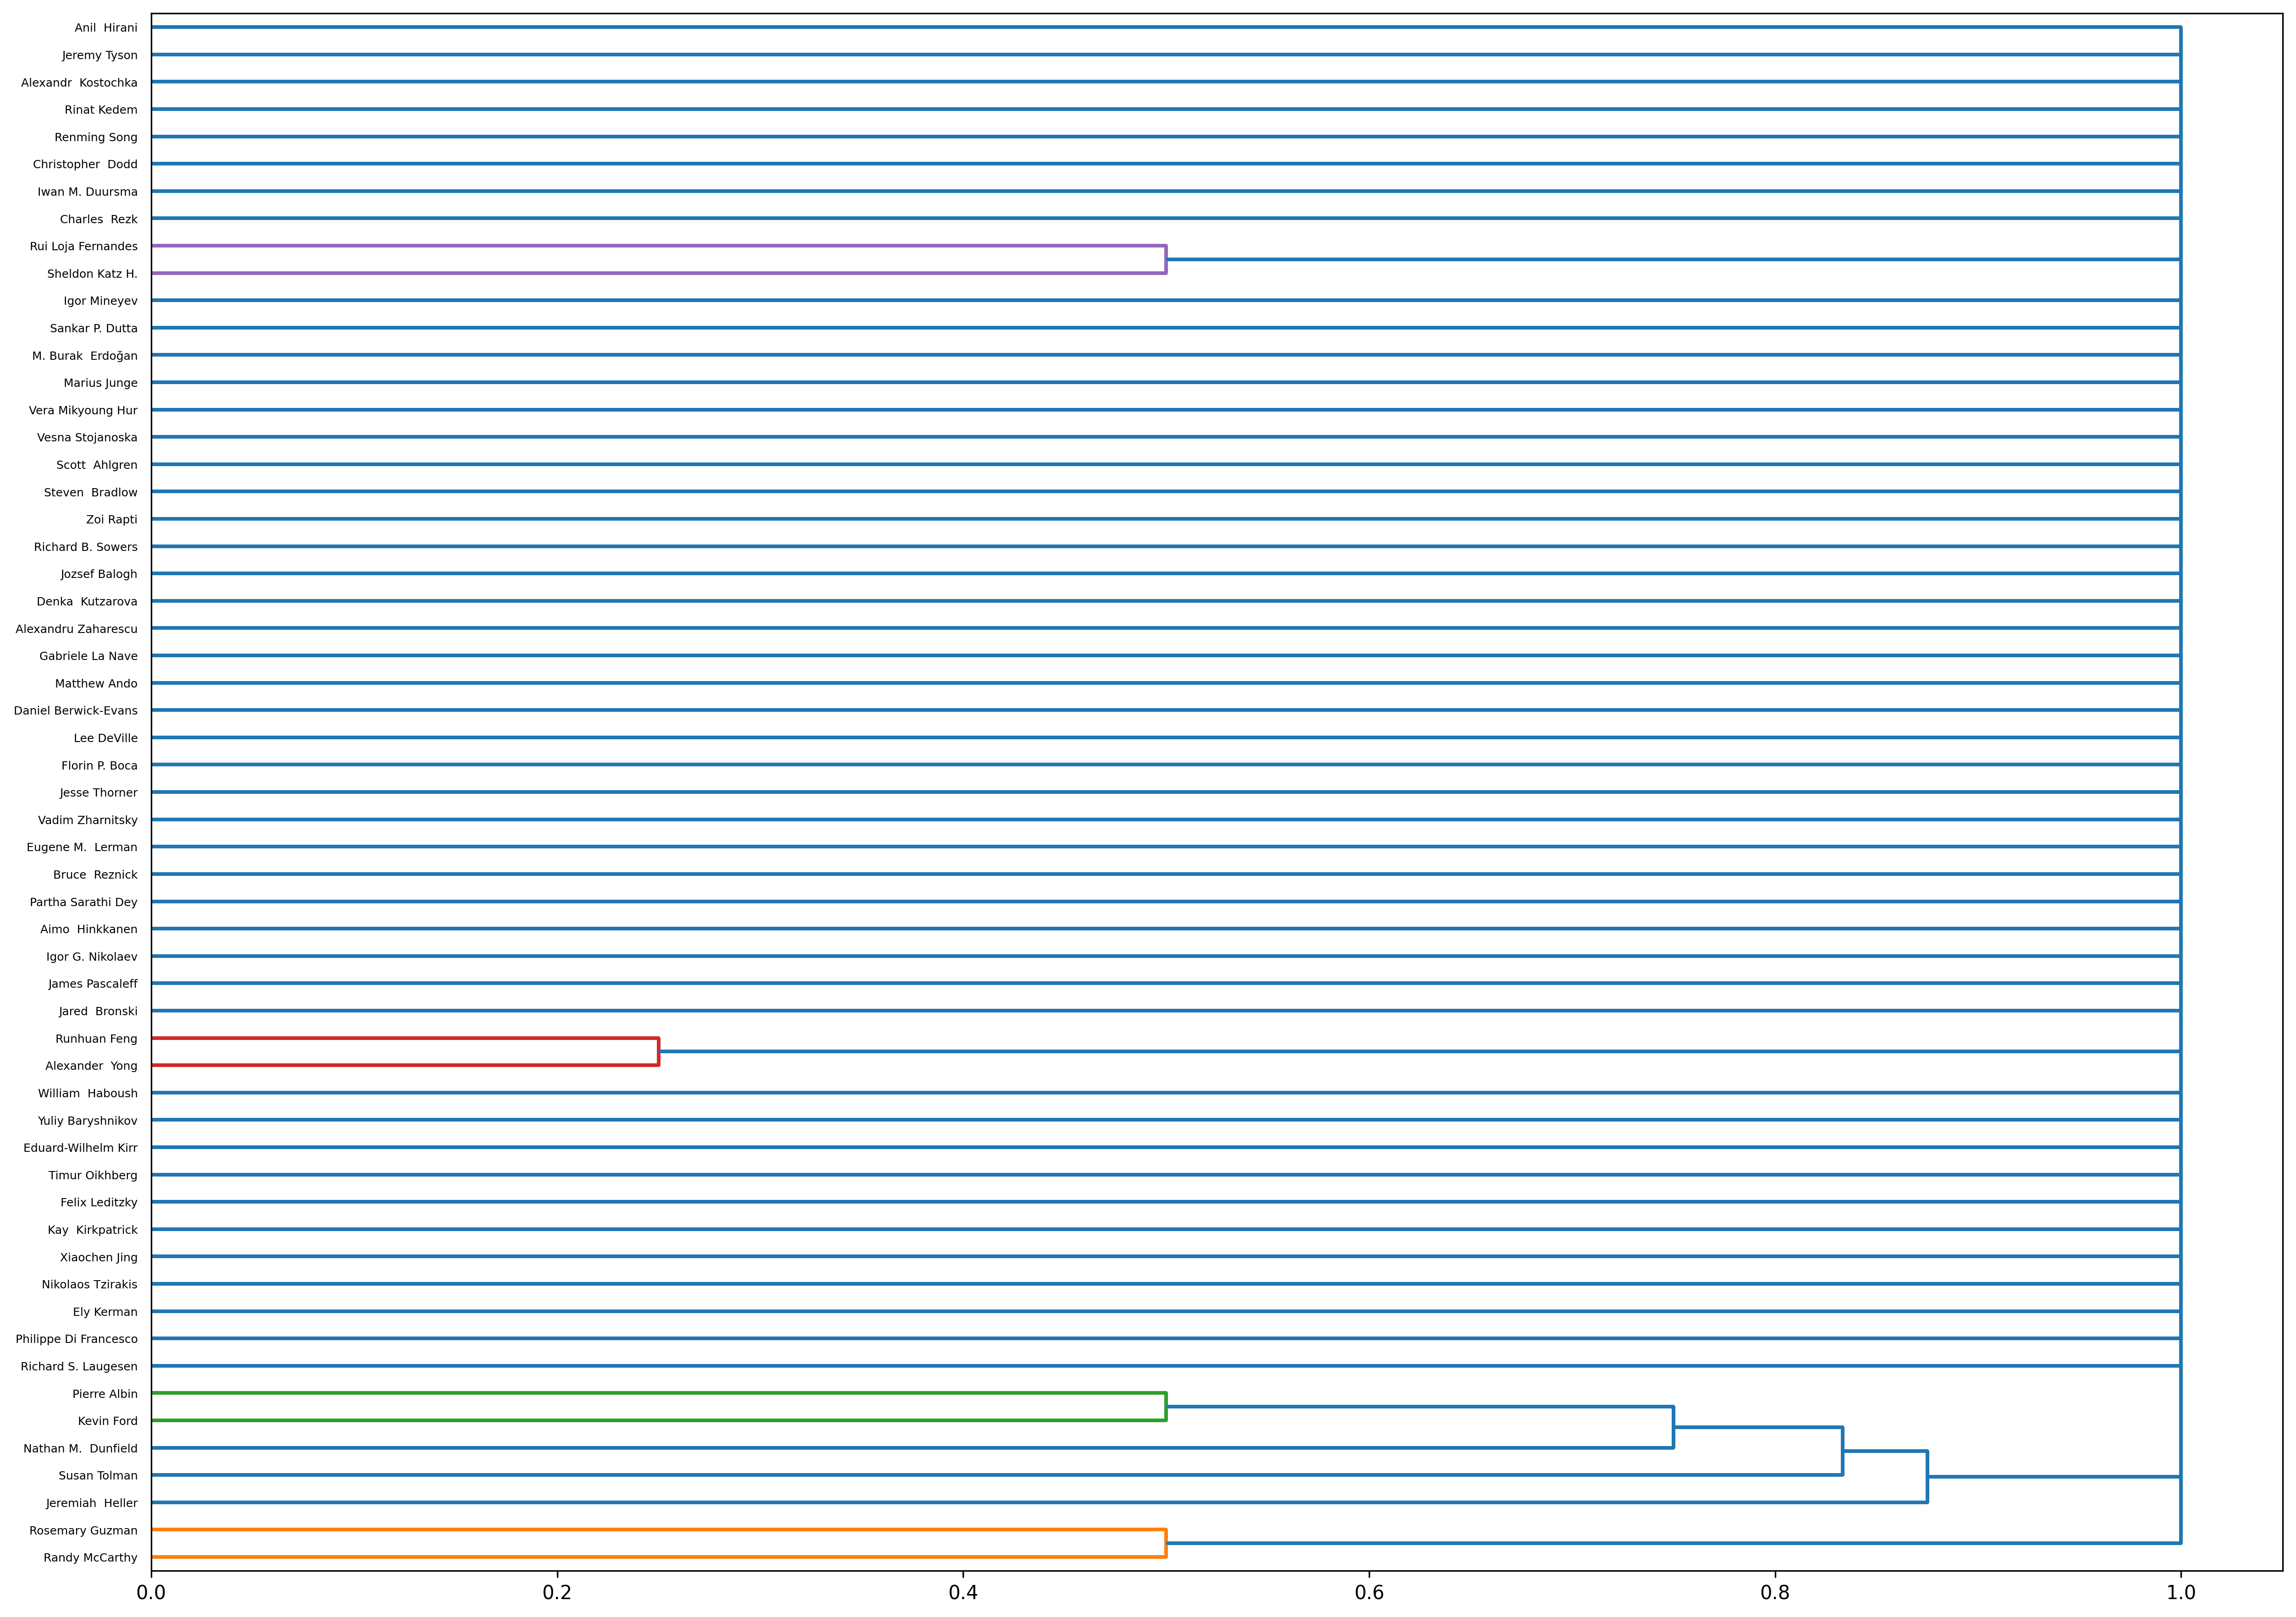

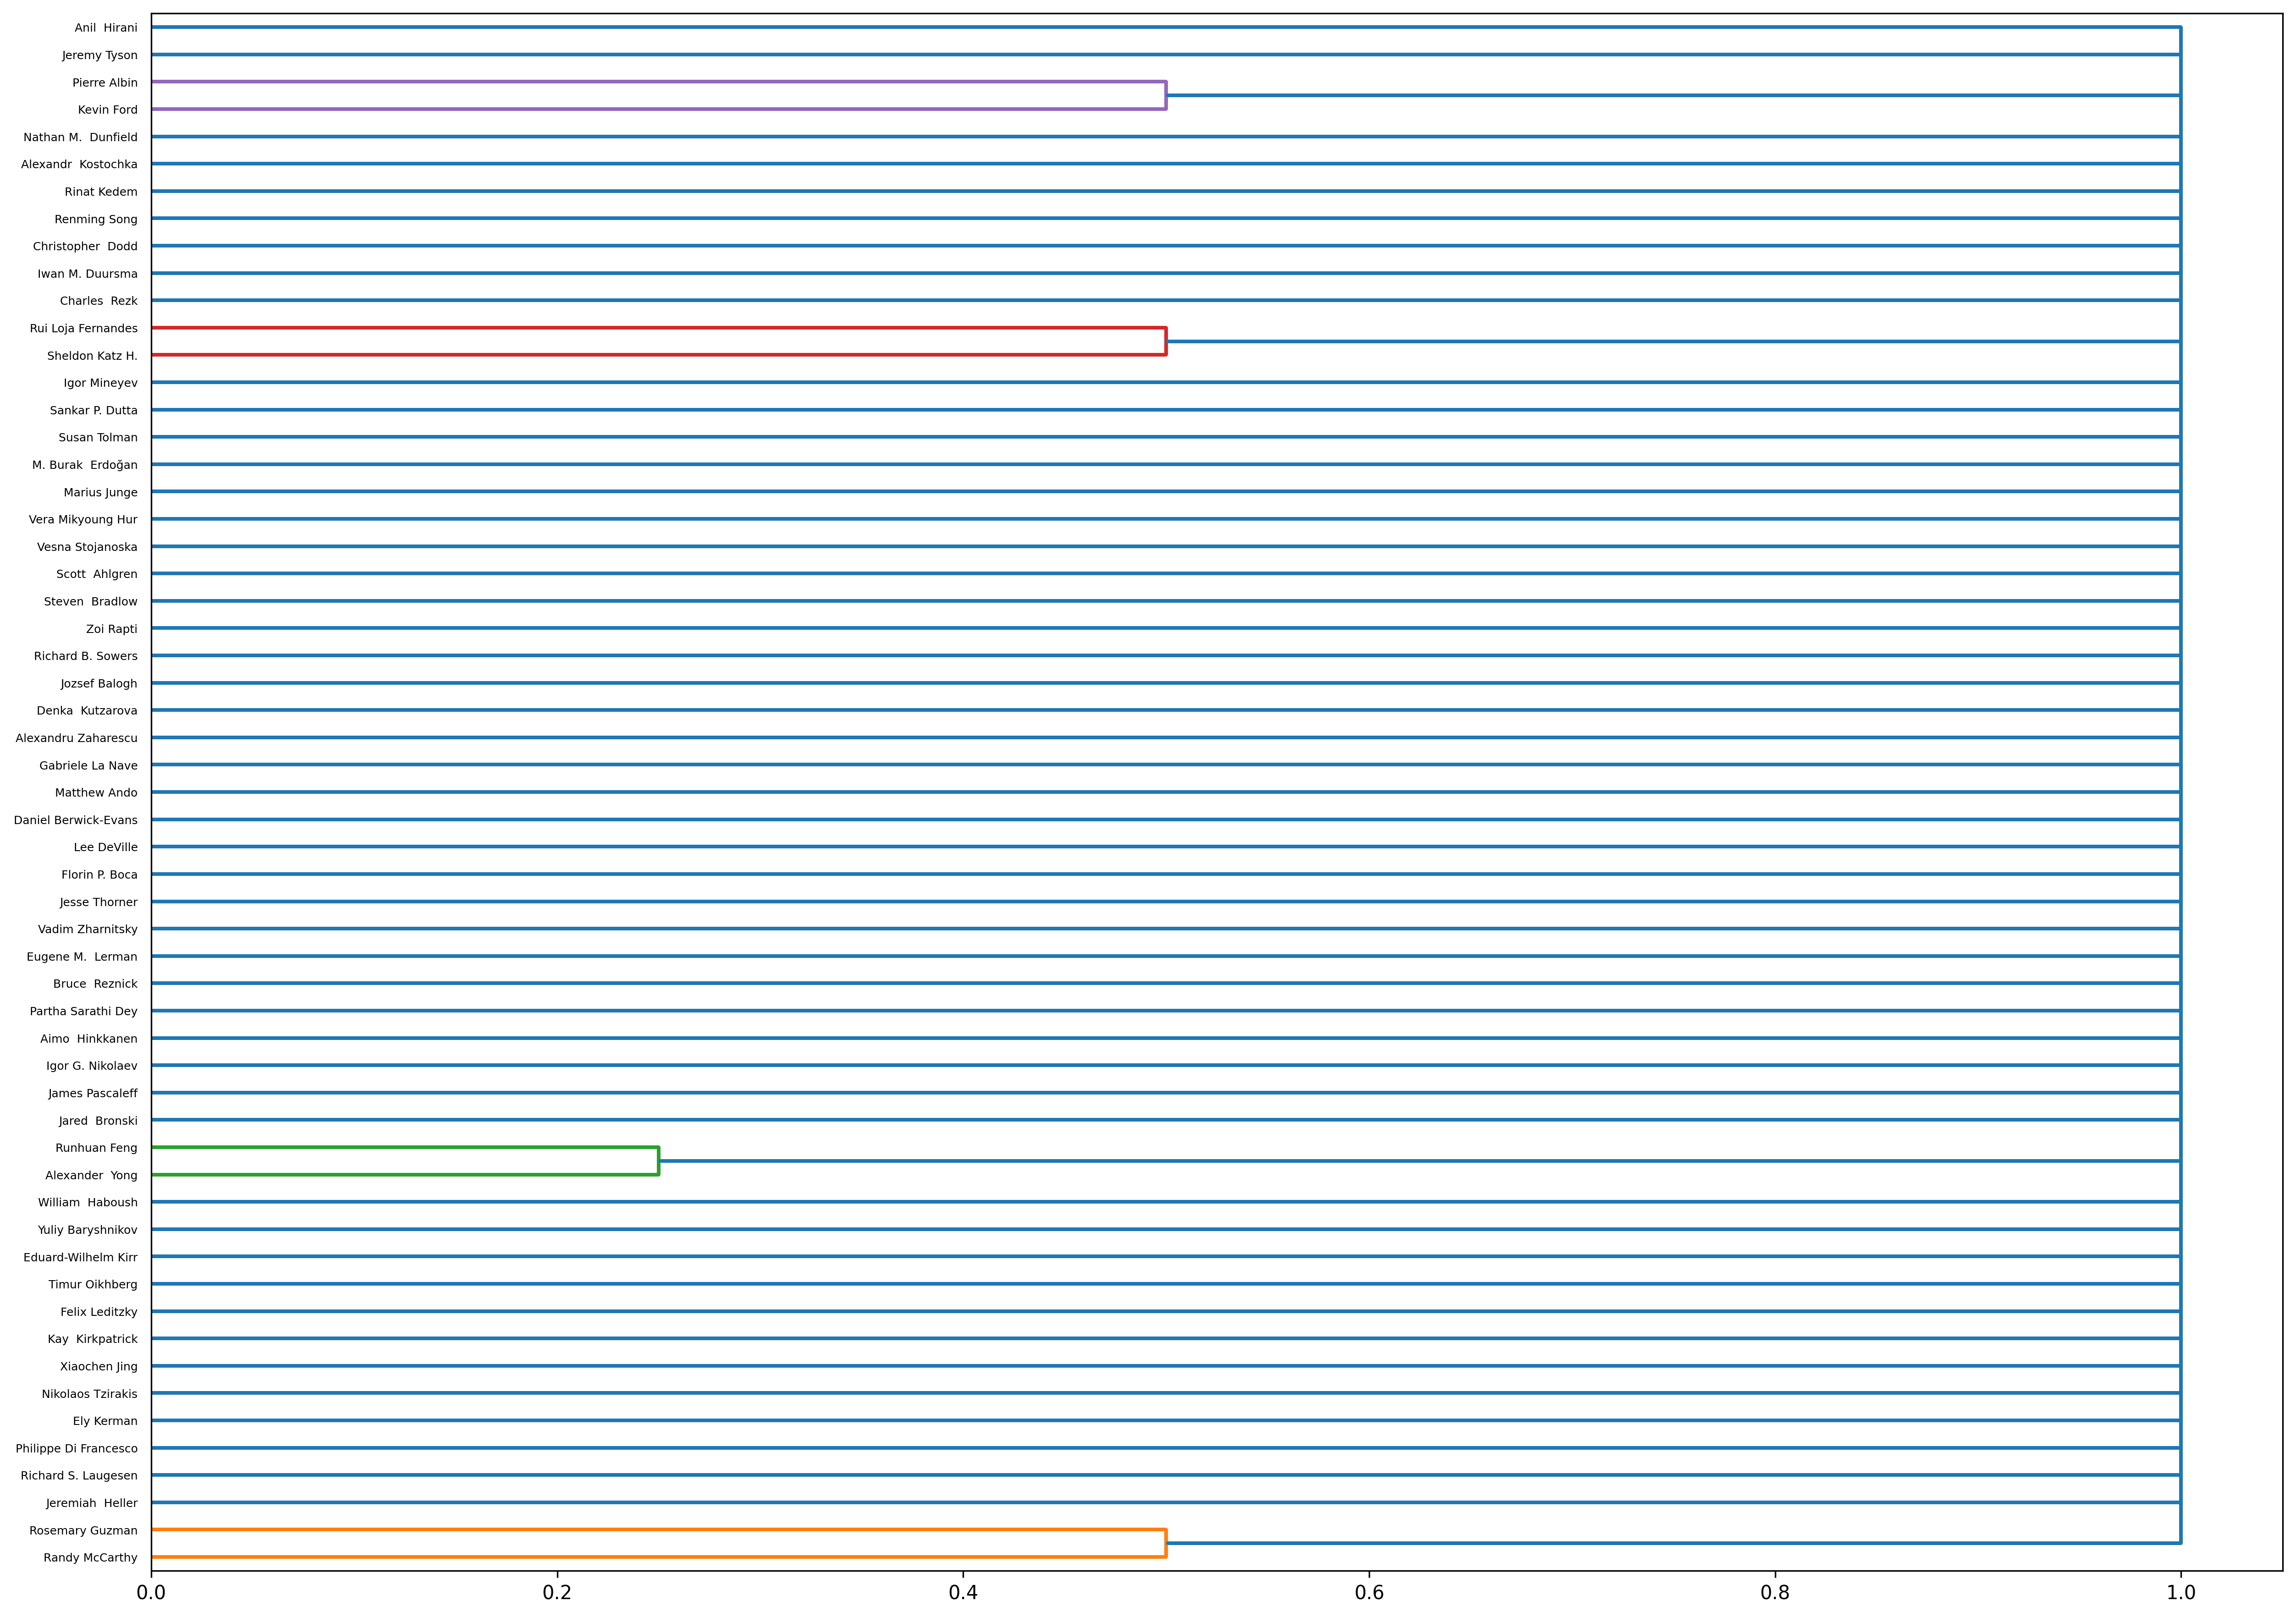

In [79]:
plot_dendrogram(distance_dir_citation, faculties, linkage="single")
plot_dendrogram(distance_dir_citation, faculties, linkage="average")
plot_dendrogram(distance_dir_citation, faculties, linkage="complete")

# Common Journal

In [38]:
df_journals = pd.read_csv("common_journals.csv")
df_journals

Unnamed: 0  Kevin Ford  Jeremy Tyson  Anil  Hirani  \
0              Kevin Ford        33.0           3.0           1.0   
1            Jeremy Tyson         3.0          24.0           0.0   
2            Anil  Hirani         1.0           0.0          10.0   
3         Sheldon Katz H.         2.0           1.0           0.0   
4            Pierre Albin         2.0           4.0           0.0   
5     Nathan M.  Dunfield         2.0           1.0           2.0   
6     Alexandr  Kostochka         3.0           0.0           1.0   
7             Rinat Kedem         1.0           1.0           0.0   
8            Renming Song         3.0           4.0           0.0   
9       Christopher  Dodd         1.0           0.0           0.0   
10        Iwan M. Duursma         1.0           1.0           0.0   
11         Randy McCarthy         1.0           0.0           0.0   
12          Charles  Rezk         0.0           1.0           0.0   
13     Rui Loja Fernandes         4.0           1.0           0.0   
14           Igor Mineyev         1.0           0.0           0.0   
15        Sankar P. Dutta         0.0           0.0           0.0   
16        Alexander  Yong         5.0           2.0           0.0   
17           Susan Tolman         2.0           1.0           0.0   
18      M. Burak  Erdoğan         2.0           6.0           0.0   
19           Marius Junge         5.0           4.0           0.0   
20      Vera Mikyoung Hur         4.0           2.0           0.0   
21       Vesna Stojanoska         4.0           1.0           0.0   
22         Scott  Ahlgren         5.0           3.0           0.0   
23        Steven  Bradlow         1.0           2.0           0.0   
24              Zoi Rapti         1.0           0.0           0.0   
25      Richard B. Sowers         1.0           0.0           0.0   
26          Jozsef Balogh         9.0           2.0           2.0   
27       Denka  Kutzarova         6.0           0.0           1.0   
28    Alexandru Zaharescu        11.0           6.0           0.0   
29       Gabriele La Nave         2.0           0.0           0.0   
30           Matthew Ando         0.0           1.0           0.0   
31   Daniel Berwick-Evans         1.0           1.0           0.0   
32            Lee DeVille         1.0           0.0           1.0   
33         Florin P. Boca         4.0           0.0           0.0   
34          Jesse Thorner         5.0           1.0           0.0   
35       Vadim Zharnitsky         1.0           1.0           1.0   
36      Eugene M.  Lerman         2.0           2.0           0.0   
37         Bruce  Reznick         1.0           1.0           0.0   
38     Partha Sarathi Dey         1.0           0.0           0.0   
39        Aimo  Hinkkanen         1.0           4.0           0.0   
40       Igor G. Nikolaev         0.0           0.0           0.0   
41        James Pascaleff         2.0           1.0           0.0   
42         Jared  Bronski         1.0           0.0           0.0   
43           Runhuan Feng         0.0           0.0           0.0   
44       William  Haboush         1.0           1.0           0.0   
45      Yuliy Baryshnikov         3.0           3.0           0.0   
46    Eduard-Wilhelm Kirr         0.0           0.0           0.0   
47         Timur Oikhberg         1.0           3.0           0.0   
48         Felix Leditzky         0.0           0.0           1.0   
49       Kay  Kirkpatrick         0.0           1.0           0.0   
50          Xiaochen Jing         0.0           0.0           0.0   
51      Nikolaos Tzirakis         1.0           4.0           0.0   
52             Ely Kerman         1.0           0.0           0.0   
53  Philippe Di Francesco         1.0           1.0           0.0   
54    Richard S. Laugesen         1.0           2.0           0.0   
55       Jeremiah  Heller         2.0           0.0           0.0   
56        Rosemary Guzman         0.0           0.0           0.0   

    Sheldon 

# ------------------- Random stuff------------------

In [187]:
ncluster = 10

single = AgglomerativeClustering(n_clusters=ncluster, linkage="single", affinity="precomputed")
labels_single = single.fit(distance_mat).labels_

complete = AgglomerativeClustering(n_clusters=ncluster, linkage="complete", affinity="precomputed")
labels_complete = complete.fit(distance_mat).labels_

average = AgglomerativeClustering(n_clusters=ncluster, linkage="average", affinity="precomputed")
labels_average = average.fit(distance_mat).labels_

# labels_single = dict(zip(faculties, labels_single))
# labels_complete = dict(zip(faculties, labels_complete))
# labels_average = dict(zip(faculties, labels_average))

In [182]:
labels_complete

array([0, 0, 2, 4, 7, 2, 0, 3, 0, 7, 0, 1, 1, 3, 7, 4, 7, 3, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 7, 1, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 1, 0, 6,
       4, 0, 0, 0, 0, 7, 6, 2, 3, 3, 4, 1, 5])

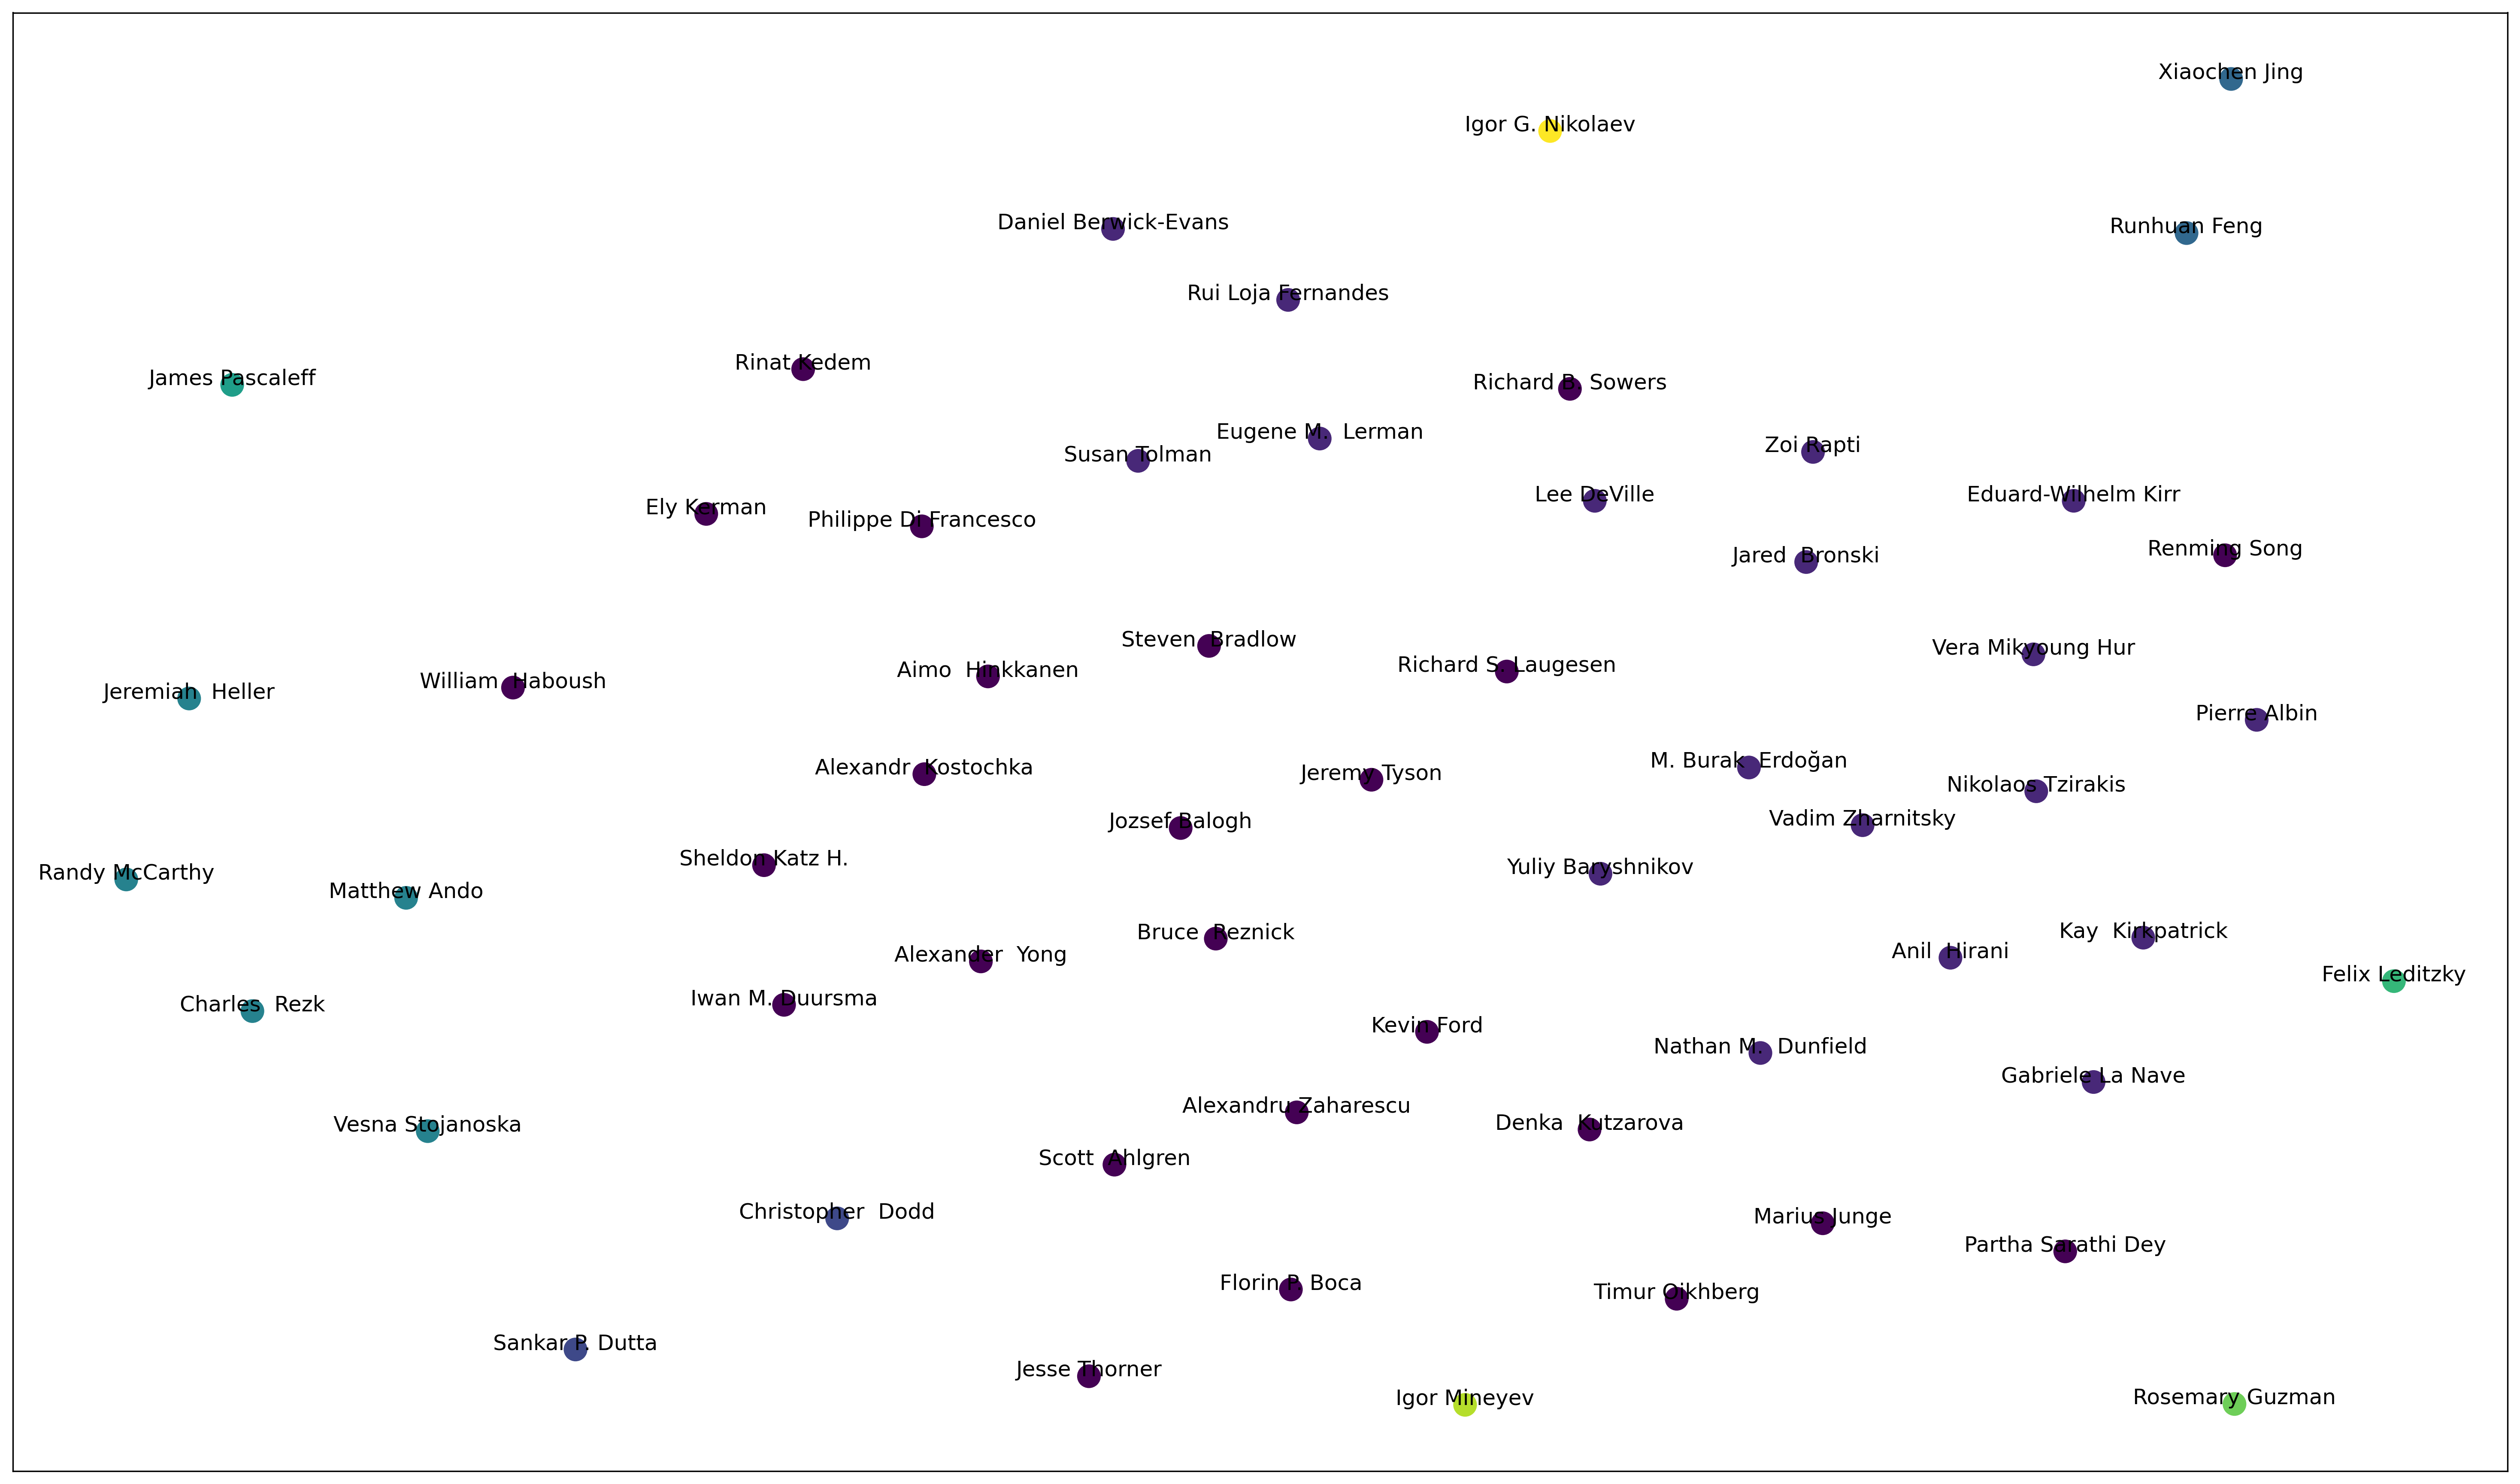

In [209]:
similarity_mat = distance_mat.copy()
np.fill_diagonal(similarity_mat, 1)
similarity_mat = 1/similarity_mat
np.fill_diagonal(similarity_mat, 0)

G = nx.from_numpy_array(similarity_mat ** 3)
nx.set_node_attributes(G, {i: faculties[i] for i in range(len(faculties))}, "name")
plt.figure(figsize=(25,15), dpi=300)
pos = nx.spring_layout(G, weight = "weight")
nx.draw_networkx_nodes(G, pos=pos, node_size=150, node_color=labels_average)
nx.draw_networkx_labels(G, pos=pos,
                        labels={i: faculties[i] for i in range(len(faculties))},
                        font_size=12, verticalalignment="baseline")
plt.savefig("graph.jpg")
plt.show()


In [142]:
np.fill_diagonal(distance_mat, 1)
distance_mat

array([[1., 3., 4., ..., 3., 4., 5.],
       [3., 1., 4., ..., 3., 5., 5.],
       [4., 4., 1., ..., 4., 6., 4.],
       ...,
       [3., 3., 4., ..., 1., 5., 6.],
       [4., 5., 6., ..., 5., 1., 5.],
       [5., 5., 4., ..., 6., 5., 1.]])

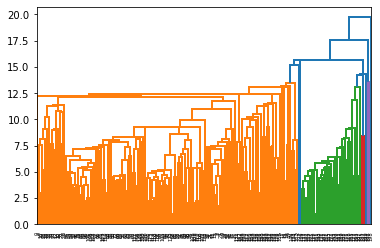

In [5]:
# Single
cl = AgglomerativeClustering(distance_threshold=None, n_clusters=5, affinity='euclidean',
                             compute_full_tree=False, linkage='single', compute_distances=True)
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

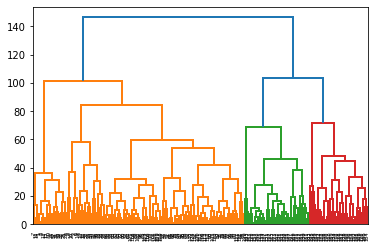

In [39]:
# Complete
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='complete')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

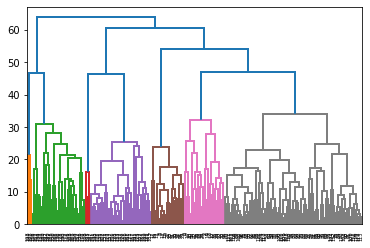

In [40]:
# average
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='average')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix)

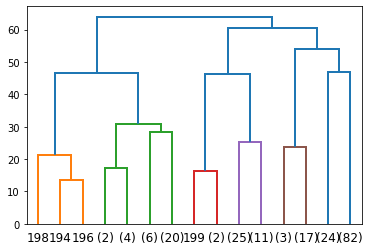

In [9]:
# ward
cl = AgglomerativeClustering(distance_threshold=0, n_clusters=None, affinity='euclidean',
                             compute_full_tree=True, linkage='average')
cl.fit(features)
n_samples = len(cl.labels_)
counts = np.zeros(cl.children_.shape[0])
for i, merge in enumerate(cl.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1  # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

    linkage_matrix = np.column_stack(
        [cl.children_, cl.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, truncate_mode="level", p=3)